In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df0 = pd.read_csv('pits_25_54_v3.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 18 columns):
Rank                 4478 non-null object
NET                  4478 non-null object
Program              4478 non-null object
Genre                4478 non-null object
Daypart              4478 non-null object
Date                 4478 non-null object
Day                  4478 non-null object
Time                 4478 non-null object
[MXM-PGM] L3D        4478 non-null object
[MXM-PGM] L3D.1      4478 non-null object
[MXM-PGM] L3D.2      4478 non-null object
[MXM-PGM] L3D.3      4478 non-null object
[MXM-PGM] L3D.4      4478 non-null object
[MXM-PGM] CM/C3      4478 non-null object
[MXM-PGM] CM/C3.1    4478 non-null object
[MXM-PGM] CM/C3.2    4478 non-null object
[MXM-PGM] CM/C3.3    4478 non-null object
[MXM-PGM] CM/C3.4    4478 non-null object
dtypes: object(18)
memory usage: 629.8+ KB


## Preparing and Cleaning Data 

In [3]:
df1=df0.iloc[:,:8]
df2=df0.iloc[:,8:13]
df3=df0.iloc[:,13:]

df2.columns=df2.columns.str.split(' ').str[1].str.split('.').str[0]
df3.columns=df3.columns.str.split(' ').str[1].str.split('.').str[0].str.split('/').str[1]
df4=pd.concat([df2,df3],axis=1)
col_names1=df4[:1].values.tolist()[0]
col_names2=df4.columns.tolist()
col_names3=[i[0] +' '+i[1] for i in zip (col_names1, col_names2)]
col_names4=[str(i).lower().replace(" ", "_") for i in col_names3]
df4.columns=col_names4
df1.columns = map(str.lower, df1.columns)
df5=pd.concat([df1,df4],axis=1)
df6=df5.iloc[1:,8:]
df6 = df6.apply(pd.to_numeric)
df=pd.concat([df5.iloc[1:,:8],df6],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 1 to 4477
Data columns (total 18 columns):
rank                   4477 non-null object
net                    4477 non-null object
program                4477 non-null object
genre                  4477 non-null object
daypart                4477 non-null object
date                   4477 non-null object
day                    4477 non-null object
time                   4477 non-null object
program_time_l3d       4477 non-null int64
commercial_time_l3d    4477 non-null float64
aa_000s_l3d            4477 non-null float64
nat_aa%_l3d            4477 non-null float64
cvg_aa%_l3d            4477 non-null float64
program_time_c3        4477 non-null int64
commercial_time_c3     4477 non-null float64
aa_000s_c3             4477 non-null float64
nat_aa%_c3             4477 non-null float64
cvg_aa%_c3             4477 non-null float64
dtypes: float64(8), int64(2), object(8)
memory usage: 629.7+ KB


I created four additional variables that are important for the analysis: 1) month, 2) prime time, 3) C3/L3 ratio, 4) program to commercial ratio

C3/L3 ratio is a very important indicator to analyze as it indicates how much likely the audience is to watch commercial breaks during the show. If it exceeds 1, that means that the audience is more likely to watch commercials of a given show and less likely to watch the show itself. Since it is a very unlikely scenario so, ideally, we would want the ratio to be closer to 1. It would mean that the audience watch commercials along with the show or at least do not switch to a different program during the commercials. For simplicity, I created only coverage C3/L3 ratio since coverage ratings are better performance indicators for cable programs. C3/L3 might be a potential dependent variable to look at when analyzing the data.

I also created program-to-commercial ratio. The ratio reflects the relationship between the length of a program and the length of a commercial. For example, for the 42 min episode of Pitbulls and Parolees, the program-to-commercial ratio is 60/18=3.33 and for 48 min episode, it is 60/12=5. The higher the ratio, the shorter the comercials are compared to the length of the program.

The program to commercial ratio in this sample varies from 4.013 to 15. The assumptions and limitations of this data set is that the commercial time reflects national advertisement only. Yes, there is actually 4 min commercial for 60 min program in the sample. Please see below the example. Note: infinity values indicate that commercial time is zero. This would be the case for sneak peaks. Depending on an analysis, program-to-commercial ration can be an informative predictor to analyze.


In [5]:
df['c3/l3']=df['cvg_aa%_c3']/df['cvg_aa%_l3d']
df['prog_com_ratio']=df['program_time_l3d']/df['commercial_time_l3d']


In [38]:
df[df['prog_com_ratio']==np.inf].iloc[:1,:]

rank            net                    program    genre  daypart      date  \
13   13  ANIMAL PLANET  PITBULLS & PAROLEES:SNEAK  Variety  UNKNOWN  12/19/15   

    day                 time  program_time_l3d  commercial_time_l3d  \
13  SAT  10:01 PM - 10:01 PM                 1                0.000   

    aa_000s_l3d  nat_aa%_l3d  cvg_aa%_l3d  program_time_c3  \
13      621.391        0.523        0.674                1   

    commercial_time_c3  aa_000s_c3  nat_aa%_c3  cvg_aa%_c3  c3/l3  \
13               0.000       0.000       0.000       0.000  0.000   

    prog_com_ratio  
13             inf

In [6]:
df.corr()

program_time_l3d  commercial_time_l3d  aa_000s_l3d  \
program_time_l3d                1.000                0.509       -0.034   
commercial_time_l3d             0.509                1.000       -0.086   
aa_000s_l3d                    -0.034               -0.086        1.000   
nat_aa%_l3d                    -0.034               -0.084        1.000   
cvg_aa%_l3d                    -0.038               -0.034        0.991   
program_time_c3                 1.000                0.509       -0.034   
commercial_time_c3              0.509                1.000       -0.086   
aa_000s_c3                      0.103               -0.027        0.967   
nat_aa%_c3                      0.103               -0.025        0.967   
cvg_aa%_c3                      0.113                0.040        0.959   
c3/l3                           0.463                0.278       -0.417   
prog_com_ratio                  0.002               -0.876        0.023   

                     nat_aa%_l3d  cvg_aa%_l3d  program_time_c3  \
program_time_l3d          -0.034       -0.038            1.000   
commercial_time_l3d       -0.084       -0.034            0.509   
aa_000s_l3d                1.000        0.991           -0.034   
nat_aa%_l3d                1.000        0.992           -0.034   
cvg_aa%_l3d                0.992        1.000           -0.038   
program_time_c3           -0.034       -0.038            1.000   
commercial_time_c3        -0.084       -0.034            0.509   
aa_000s_c3                 0.966        0.952            0.103   
nat_aa%_c3                 0.967        0.953            0.103   
cvg_aa%_c3                 0.959        0.963            0.113   
c3/l3                     -0.417       -0.422            0.463   
prog_com_ratio             0.020       -0.023            0.002   

                     commercial_time_c3  aa_000s_c3  nat_aa%_c3  cvg_aa%_c3  \
program_time_l3d                  0.509       0.103       0.103       0.113   
commercial_time_l3d               1.000      -0.027      -0.025       0.040   
aa_000s_l3d                      -0.086       0.967       0.967       0.959   
nat_aa%_l3d                      -0.084       0.966       0.967       0.959   
cvg_aa%_l3d                      -0.034       0.952       0.953       0.963   
program_time_c3                   0.509       0.103       0.103       0.113   
commercial_time_c3                1.000      -0.027      -0.025       0.040   
aa_000s_c3                       -0.027       1.000       1.000       0.990   
nat_aa%_c3                       -0.025       1.000       1.000       0.990   
cvg_aa%_c3                        0.040       0.990       0.990       1.000   
c3/l3                             0.278      -0.215      -0.215      -0.205   
prog_com_ratio                   -0.876       0.029       0.027      -0.023   

                     c3/l3  prog_com_ratio  
program_time_l3d     0.463           0.002  
commercial_time_l3d  0.278          -0.876  
aa_000s_l3d         -0.417           0.023  
nat_aa%_l3d         -0.417           0.020  
cvg_aa%_l3d         -0.422          -0.023  
program_time_c3      0.463           0.002  
commercial_time_c3   0.278          -0.876  
aa_000s_c3          -0.215           0.029  
nat_aa%_c3          -0.215           0.027  
cvg_aa%_c3          -0.205          -0.023  
c3/l3                1.000          -0.042  
prog_com_ratio      -0.042           1.000

In [39]:

print ('Min ratio:', df['prog_com_ratio'].sort_values().head(1))
print ('Max ratio', df['prog_com_ratio'].sort_values().tail(13))

Min ratio: 1820   4.013
Name: prog_com_ratio, dtype: float64
Max ratio 3787   15.000
352       inf
173       inf
128       inf
177       inf
188       inf
197       inf
2246      inf
297       inf
213       inf
2688      inf
13        inf
658       inf
Name: prog_com_ratio, dtype: float64


In [40]:
df['date_']=df['date'].map(lambda x: str(x).split('/')[0])
def month(date):
    if int(date)==1:return "January"
    elif int(date)==2:return 'February'
    elif int(date)==3:return "March"
    elif int(date)==4:return 'April'
    elif int(date)==5:return 'May'
    elif int(date)==6:return 'June'
    elif int(date)==7:return 'July'
    elif int(date)==8:return 'August'
    elif int(date)==9:return 'September'
    elif int(date)==10:return 'October'
    elif int(date)==11:return 'November'
    elif int(date)==12:return 'December'
df['month']=df['date_'].map(month)  

In [41]:
import re
def time(time):
    if  str(time).startswith("08") and re.search(r'PM',time):
        return '8pm - 9pm'
    if str(time).startswith("09") and re.search(r'PM',str(time)):
        return '9pm - 10pm'
    if str(time).startswith("10") and re.search(r'PM',str(time)):
        return '10pm - 11pm'
    if str(time).startswith("11") and re.search(r'PM',str(time)):
        return '11pm - 12pm'
    else:
        return 'Other than\nPrime Time'
df["prime_time"]=df['time'].map(time)

Lake5 divides the program into several categories:

1)	Pitbulls and Parolees 
2)	Pitbulls and Parolees: Unchained
3)	Pitbulls and Parolees: Special
4)	Pitbulls and Parolees: Unleashed
5)	Pitbulls and Parolees: Dir 
6)	Pitbulls and Parolees: Sneak
7)	Pitbulls and Parolees: Pac
8)	Pitbulls and Parolees: After
9)	Pitbulls and Parolees: After


I only picked the first 4 program types to analyze separately as they have enough rows of data to analyze. I also analyzed all Pitbull and Parolees programs together and created a new category Pitbull and Parolees: Primetime that includes prime time episodes only. Primetime ratings and data should behave differently from other ratings and data as prime time is more likely to attract more audience and the fans of the show. Thus, for the analysis, I had 6 program types: 1) Pitbulls and Parolees:  All, 2) Pitbulls and Parolees, 3) Pitbulls and Parolees: Primetime, 4) Pitbulls and Parolees: Unchained, 5) Pitbulls and Parolees: Special, 6) Pitbulls and Parolees: Unleashed

Note: ‘Pitbulls and Parolees:  All’ includes all  program types (all data together for Pitbulls and Parolees)


In [42]:
df['program'].value_counts()

PITBULLS AND PAROLEES        4068
PIT BULLS PAROLEES: UNCHA     305
PITBULLS & PAROLEES SPCL       40
PITBULLS AND PAROLS RECAP      21
PIT BULLS AND PAROL UNLEA      17
PITBULLS & PAROLEES:SNEAK      11
PIT BULLS & PAROLEES: DIR       8
PIT BULLS & PAROLEES: PAC       4
PIT BULLS PAROLEES: AFTER       2
PITBULLS & PAROLEES: FORE       1
Name: program, dtype: int64

In [43]:
df_pp=df[df['program']=='PITBULLS AND PAROLEES']
filter_time= ['10pm - 11pm','9pm - 10pm','11pm - 12pm','8pm - 9pm']
df_pp_prime=df_pp[df_pp.prime_time.isin(filter_time)]
df_uchained=df[df['program']=='PIT BULLS PAROLEES: UNCHA']
df_special=df[df['program']=='PITBULLS & PAROLEES SPCL']
df_recap=df[df['program']=='PITBULLS AND PAROLS RECAP']

# Program-to-Commercial Ratio and its Relationship to Ratings

First, I looked at the relationship between program-to-commercial ratio and various ratings, including C3/L3 ratio. If some relationships are present, we can preliminary see whether program length affects L3 and C3. 

In [44]:
def scatter_plot(var1, var2):
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: All','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME','PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,15))
    
    plt.tight_layout(h_pad=13,w_pad=10)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        dfx.plot.scatter(x=var1, y=var2,c='DarkBlue',s=10, ax=ax)
        ax.set_title("Relationship between\n" + var1 + " and " + var2+ "\n"+name,\
                  x=.5, fontsize=20,family='serif')
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        print ('\033[1m'+name+'\033[0m')
        print()
        print (dfx[[var1, var2]].corr())
        print()
    plt.show()
    return scatter_plot

## Program-to-Commercial Ratio and AA(000)s L3

PITBULLS & PAROLEES: All

                prog_com_ratio  aa_000s_l3d
prog_com_ratio           1.000        0.023
aa_000s_l3d              0.023        1.000

PITBULLS & PAROLEES

                prog_com_ratio  aa_000s_l3d
prog_com_ratio           1.000        0.029
aa_000s_l3d              0.029        1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  aa_000s_l3d
prog_com_ratio           1.000        0.174
aa_000s_l3d              0.174        1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  aa_000s_l3d
prog_com_ratio           1.000       -0.121
aa_000s_l3d             -0.121        1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  aa_000s_l3d
prog_com_ratio           1.000        0.329
aa_000s_l3d              0.329        1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  aa_000s_l3d
prog_com_ratio           1.000       -0.114
aa_000s_l3d             -0.114        1.000



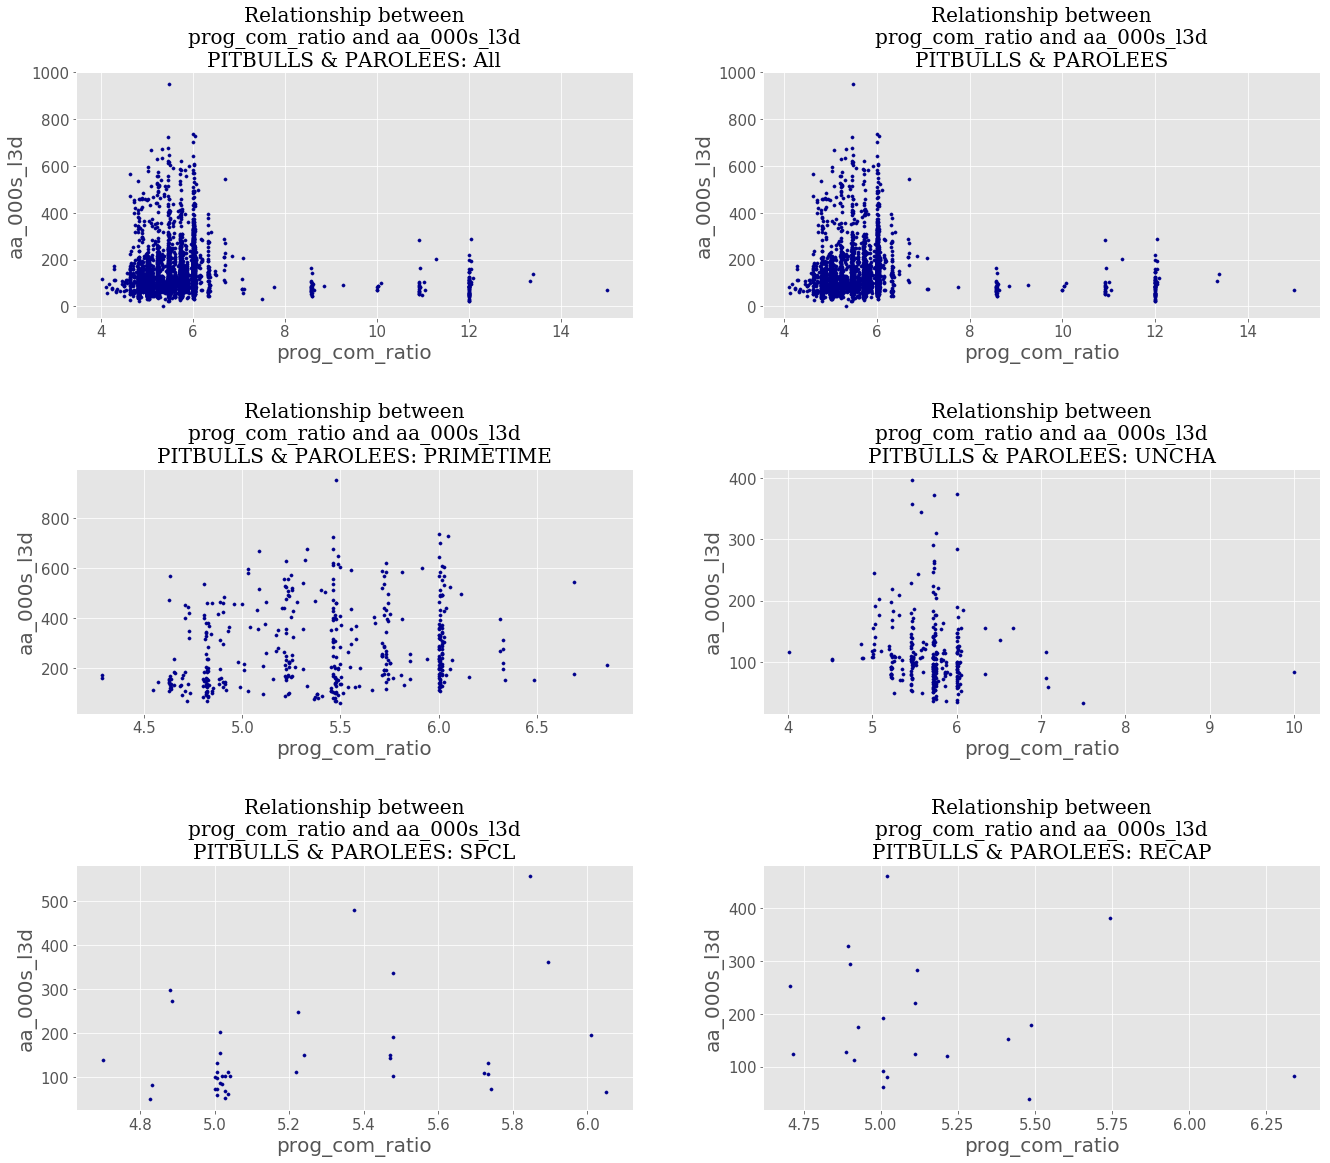

<function __main__.scatter_plot(var1, var2)>

In [45]:
scatter_plot('prog_com_ratio','aa_000s_l3d')

It looks like we observe some relationships between program-to-commercial ratio and AA(000)s L3 rating for primetime (r=.17) and specials (r=.33), which is a good sign as it indicates a possibility of program length increasing the rating. The program-to-commercial ratio positively correlates with average audience impressions – the effect we are looking for. 

## Program-to-Commercial Ratio and National AA% L3

PITBULLS & PAROLEES: All

                prog_com_ratio  nat_aa%_l3d
prog_com_ratio           1.000        0.020
nat_aa%_l3d              0.020        1.000

PITBULLS & PAROLEES

                prog_com_ratio  nat_aa%_l3d
prog_com_ratio           1.000        0.027
nat_aa%_l3d              0.027        1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  nat_aa%_l3d
prog_com_ratio           1.000        0.164
nat_aa%_l3d              0.164        1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  nat_aa%_l3d
prog_com_ratio           1.000       -0.123
nat_aa%_l3d             -0.123        1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  nat_aa%_l3d
prog_com_ratio           1.000        0.332
nat_aa%_l3d              0.332        1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  nat_aa%_l3d
prog_com_ratio           1.000       -0.117
nat_aa%_l3d             -0.117        1.000



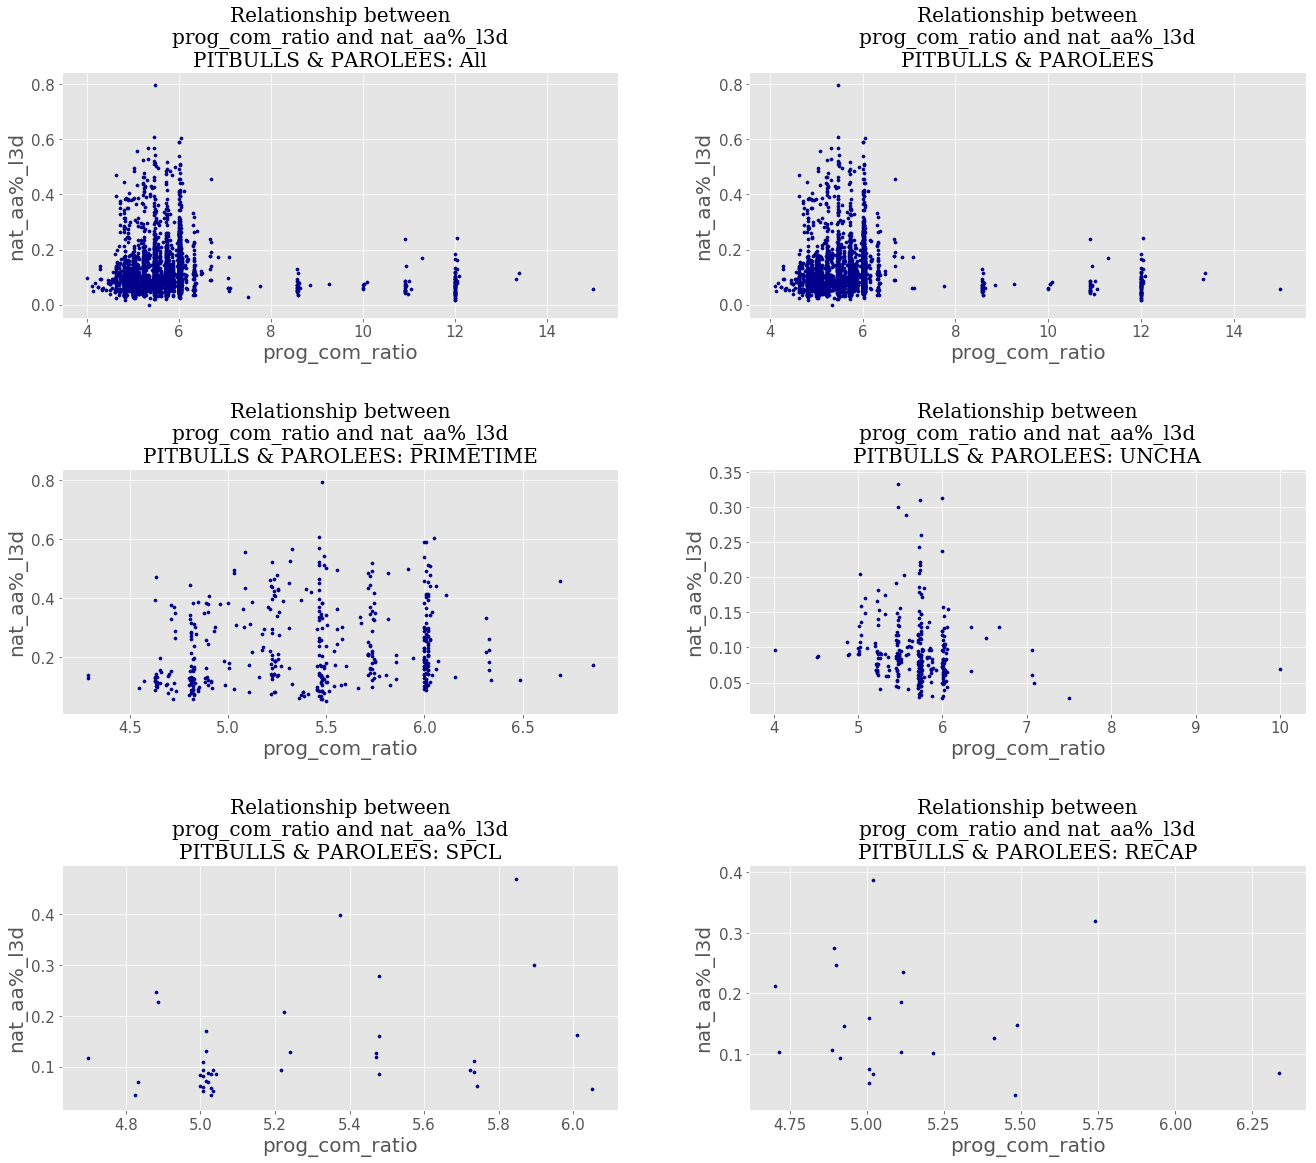

<function __main__.scatter_plot(var1, var2)>

In [46]:
scatter_plot('prog_com_ratio','nat_aa%_l3d')

Again, we observe positive relationships between program-to-commercial ratio and national average audience rating (L3) for prime time episodes (r=.16) and specials (r=.33). 

## Program-to-Commercial Ratio and Coverage AA% L3

PITBULLS & PAROLEES: All

                prog_com_ratio  cvg_aa%_l3d
prog_com_ratio           1.000       -0.023
cvg_aa%_l3d             -0.023        1.000

PITBULLS & PAROLEES

                prog_com_ratio  cvg_aa%_l3d
prog_com_ratio           1.000       -0.017
cvg_aa%_l3d             -0.017        1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  cvg_aa%_l3d
prog_com_ratio           1.000        0.072
cvg_aa%_l3d              0.072        1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  cvg_aa%_l3d
prog_com_ratio           1.000       -0.139
cvg_aa%_l3d             -0.139        1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  cvg_aa%_l3d
prog_com_ratio           1.000        0.311
cvg_aa%_l3d              0.311        1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  cvg_aa%_l3d
prog_com_ratio           1.000       -0.128
cvg_aa%_l3d             -0.128        1.000



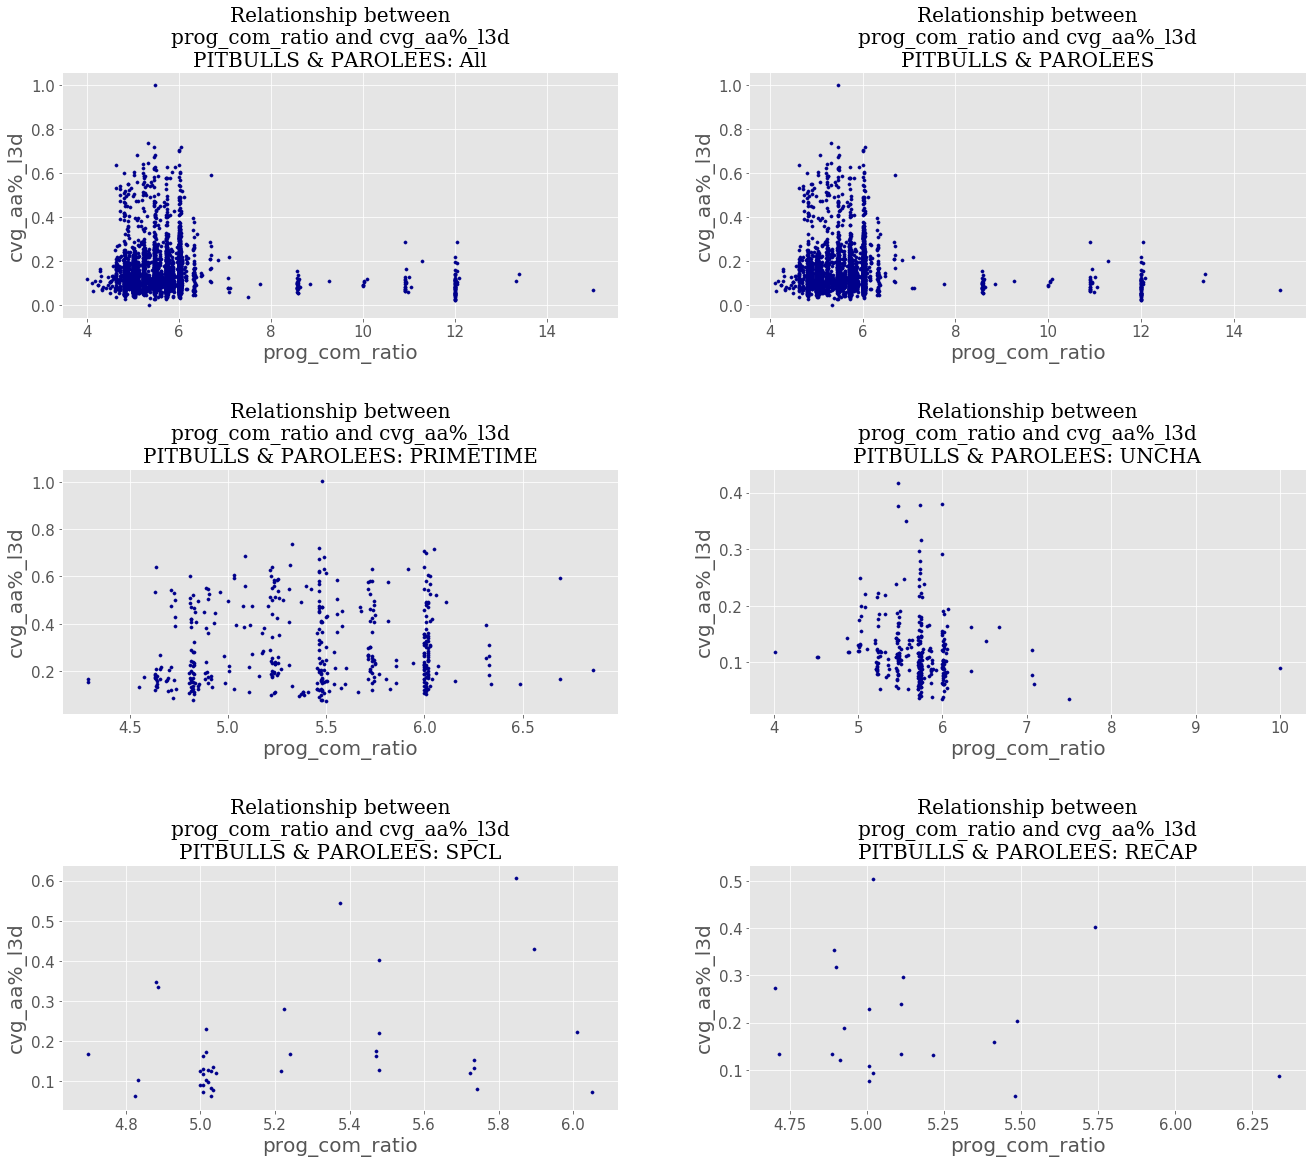

<function __main__.scatter_plot(var1, var2)>

In [47]:
scatter_plot('prog_com_ratio','cvg_aa%_l3d')

Data on coverage average audience rating reveals no correlation between the rating and program-to-commercial ratio (r=.07) and some small-size negative correlations between unchained episodes (r=-.14) and recap episodes (r=-.13). The positive relationship between the rating and the ratio still exists for specials (r=.31)

## Program-to-Commercial Ratio and AA(000)s C3

PITBULLS & PAROLEES: All

                prog_com_ratio  aa_000s_c3
prog_com_ratio           1.000       0.029
aa_000s_c3               0.029       1.000

PITBULLS & PAROLEES

                prog_com_ratio  aa_000s_c3
prog_com_ratio           1.000       0.036
aa_000s_c3               0.036       1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  aa_000s_c3
prog_com_ratio           1.000       0.215
aa_000s_c3               0.215       1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  aa_000s_c3
prog_com_ratio           1.000      -0.111
aa_000s_c3              -0.111       1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  aa_000s_c3
prog_com_ratio           1.000       0.354
aa_000s_c3               0.354       1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  aa_000s_c3
prog_com_ratio           1.000      -0.104
aa_000s_c3              -0.104       1.000



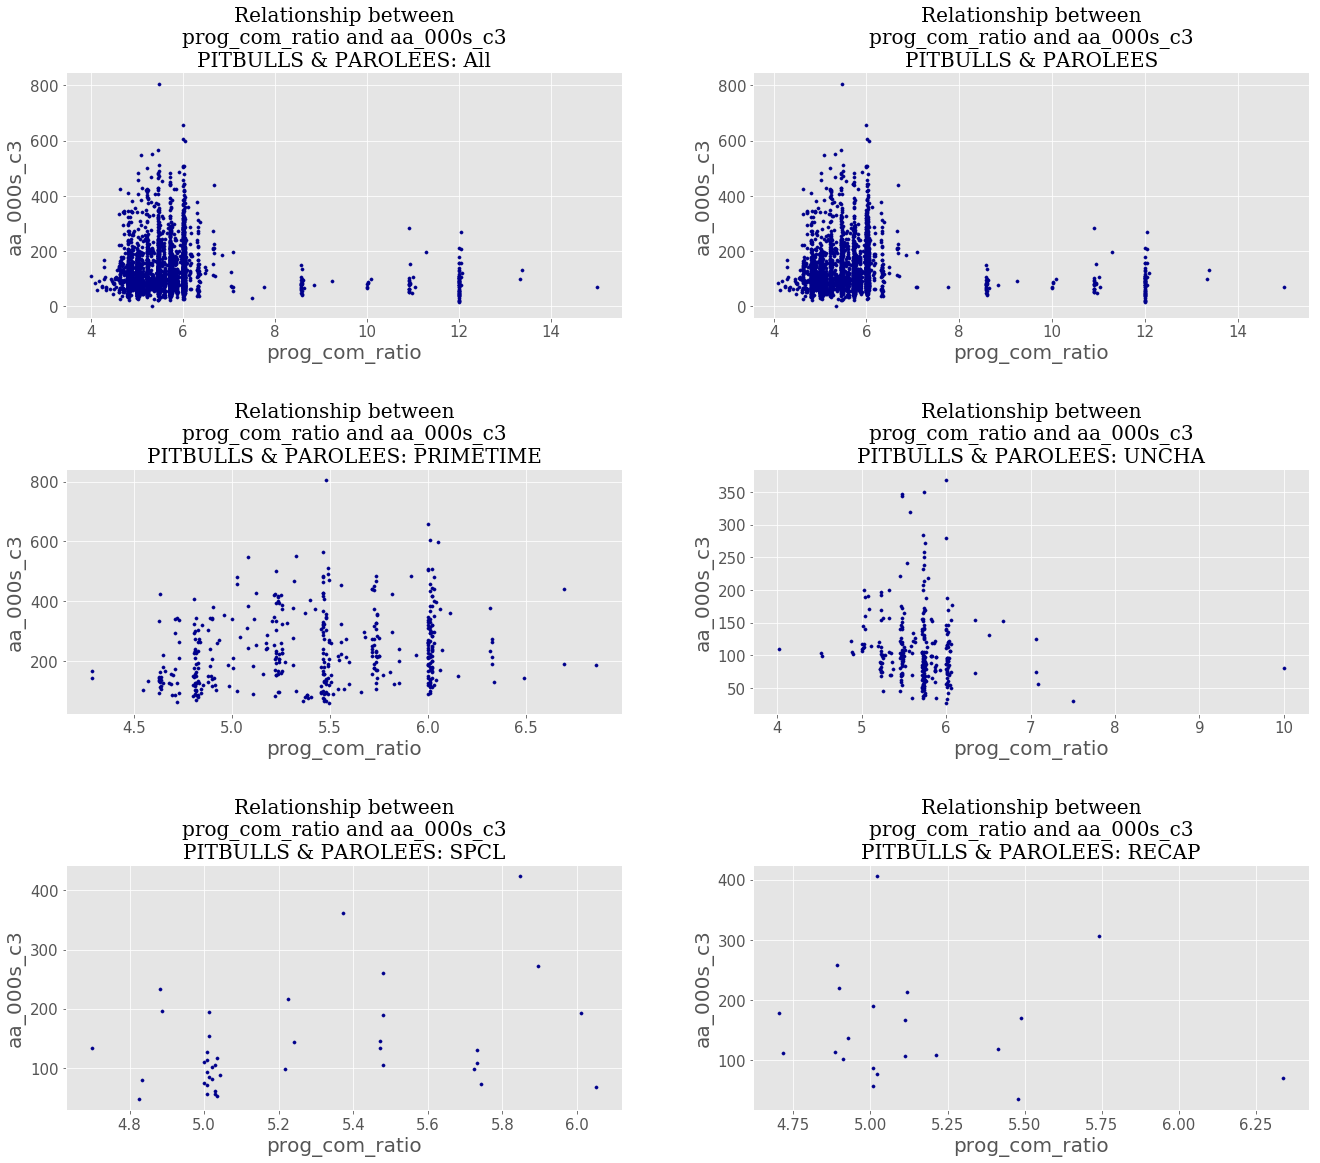

<function __main__.scatter_plot(var1, var2)>

In [48]:
scatter_plot('prog_com_ratio','aa_000s_c3')

It’s amazing, but it seems like we have some positive relationship between the ratio and average audience impressions for commercials in the case of prime-time episodes (r=.22) and specials (r=.35).  

## Program-to-Commercial Ratio and National AA% C3

PITBULLS & PAROLEES: All

                prog_com_ratio  nat_aa%_c3
prog_com_ratio           1.000       0.027
nat_aa%_c3               0.027       1.000

PITBULLS & PAROLEES

                prog_com_ratio  nat_aa%_c3
prog_com_ratio           1.000       0.033
nat_aa%_c3               0.033       1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  nat_aa%_c3
prog_com_ratio           1.000       0.203
nat_aa%_c3               0.203       1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  nat_aa%_c3
prog_com_ratio           1.000      -0.113
nat_aa%_c3              -0.113       1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  nat_aa%_c3
prog_com_ratio           1.000       0.357
nat_aa%_c3               0.357       1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  nat_aa%_c3
prog_com_ratio           1.000      -0.107
nat_aa%_c3              -0.107       1.000



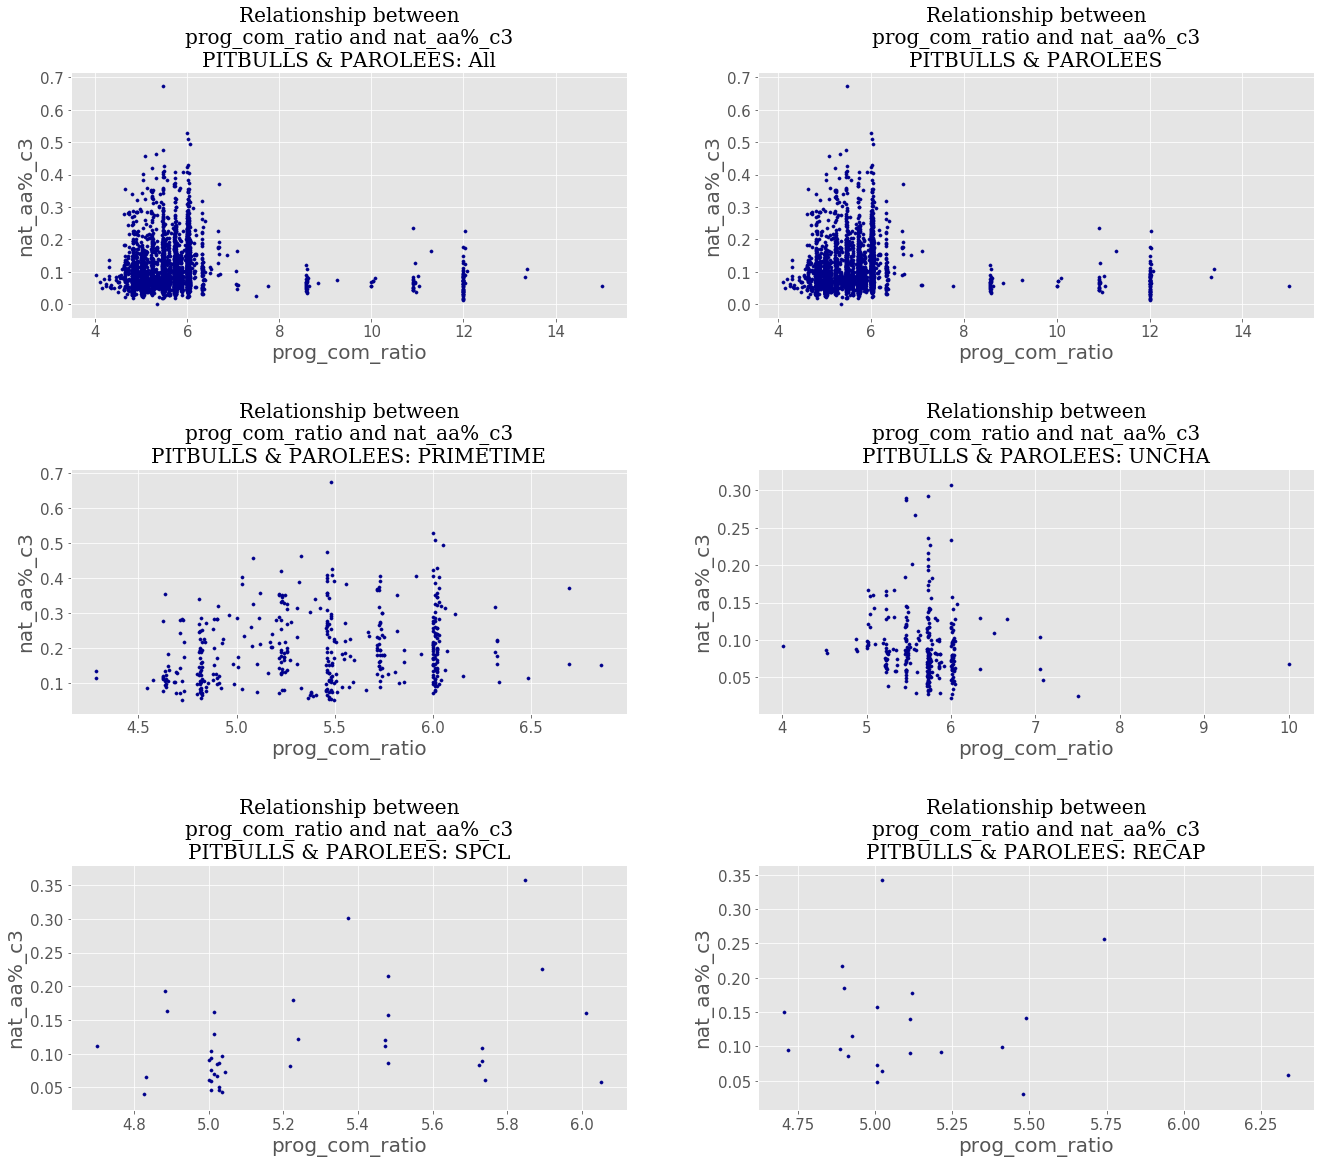

<function __main__.scatter_plot(var1, var2)>

In [49]:
scatter_plot('prog_com_ratio','nat_aa%_c3')

The same relationships can be observed with national average audience rating, with r=.20 for prime time and r=.35 for specials.

## Program-to-Commercial Ratio and Coverage AA% C3

PITBULLS & PAROLEES: All

                prog_com_ratio  cvg_aa%_c3
prog_com_ratio           1.000      -0.023
cvg_aa%_c3              -0.023       1.000

PITBULLS & PAROLEES

                prog_com_ratio  cvg_aa%_c3
prog_com_ratio           1.000      -0.017
cvg_aa%_c3              -0.017       1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  cvg_aa%_c3
prog_com_ratio           1.000       0.100
cvg_aa%_c3               0.100       1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  cvg_aa%_c3
prog_com_ratio           1.000      -0.130
cvg_aa%_c3              -0.130       1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  cvg_aa%_c3
prog_com_ratio           1.000       0.334
cvg_aa%_c3               0.334       1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  cvg_aa%_c3
prog_com_ratio           1.000      -0.118
cvg_aa%_c3              -0.118       1.000



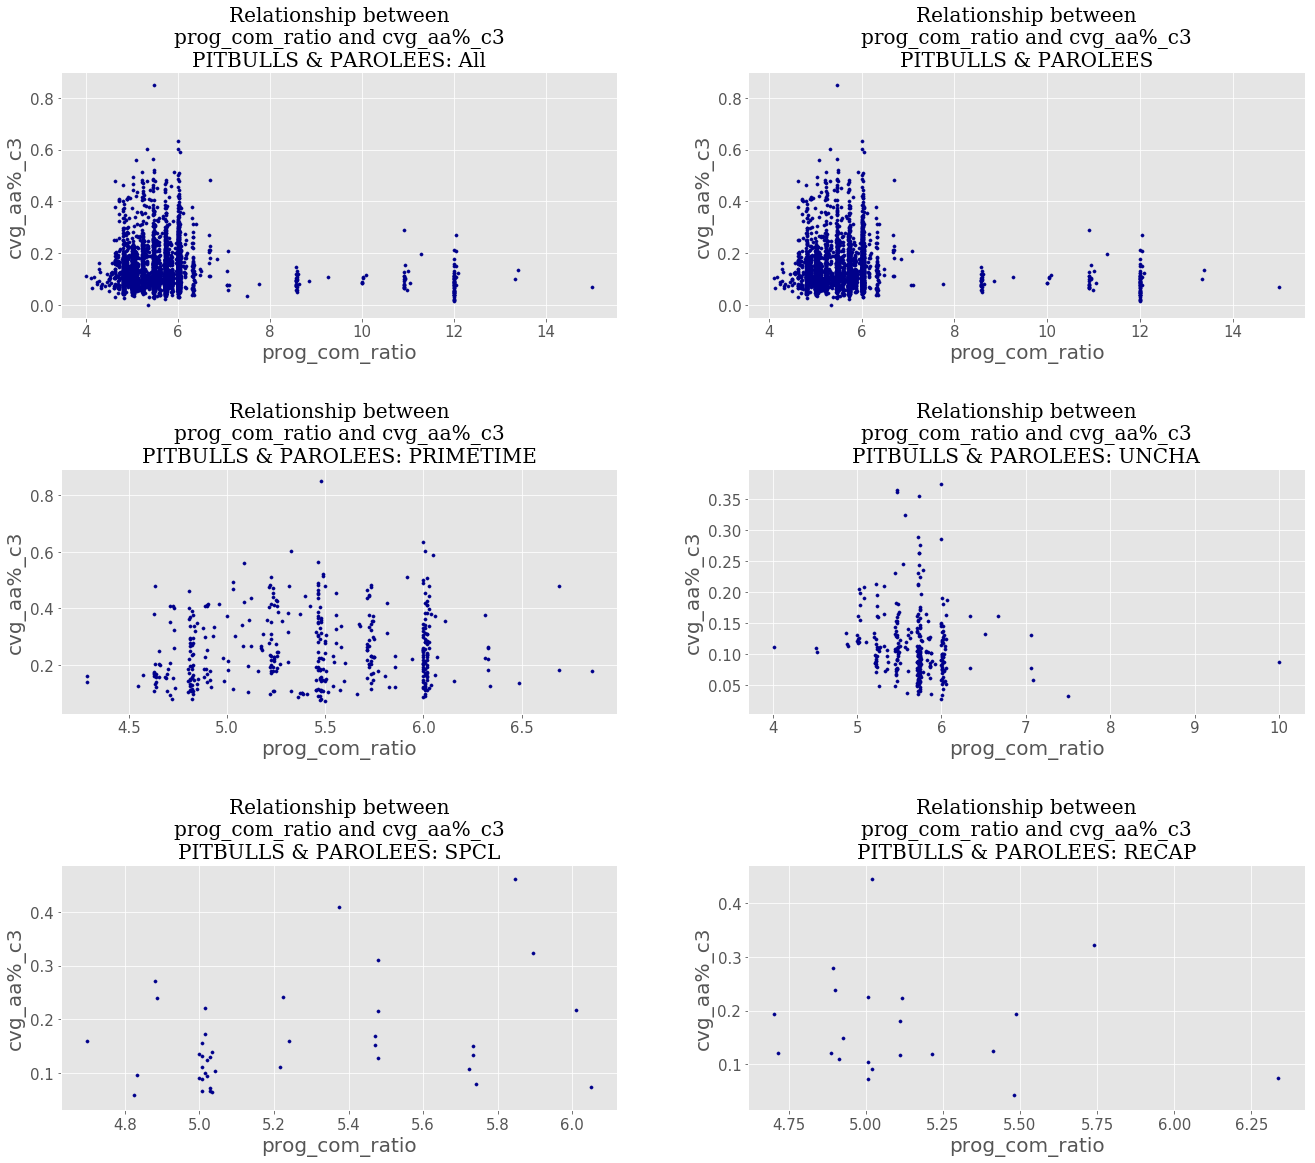

<function __main__.scatter_plot(var1, var2)>

In [50]:
scatter_plot('prog_com_ratio','cvg_aa%_c3')

Program-to-commercial ratio has practically no relationship with coverage average audience rating for commercials(r=.10) and some small-size negative relationship with unchained and recap episodes (r=-.13 and r=-.12, respectively). However, we can still observe the positive relationship between the ration and the rating for specials (r=.33).

## Program-to-Commercial Ratio and Coverage C3/L3 ratio

PITBULLS & PAROLEES: All

                prog_com_ratio  c3/l3
prog_com_ratio           1.000 -0.042
c3/l3                   -0.042  1.000

PITBULLS & PAROLEES

                prog_com_ratio  c3/l3
prog_com_ratio           1.000 -0.050
c3/l3                   -0.050  1.000

PITBULLS & PAROLEES: PRIMETIME

                prog_com_ratio  c3/l3
prog_com_ratio           1.000 -0.018
c3/l3                   -0.018  1.000

PITBULLS & PAROLEES: UNCHA

                prog_com_ratio  c3/l3
prog_com_ratio           1.000  0.043
c3/l3                    0.043  1.000

PITBULLS & PAROLEES: SPCL

                prog_com_ratio  c3/l3
prog_com_ratio           1.000 -0.069
c3/l3                   -0.069  1.000

PITBULLS & PAROLEES: RECAP

                prog_com_ratio  c3/l3
prog_com_ratio           1.000  0.045
c3/l3                    0.045  1.000



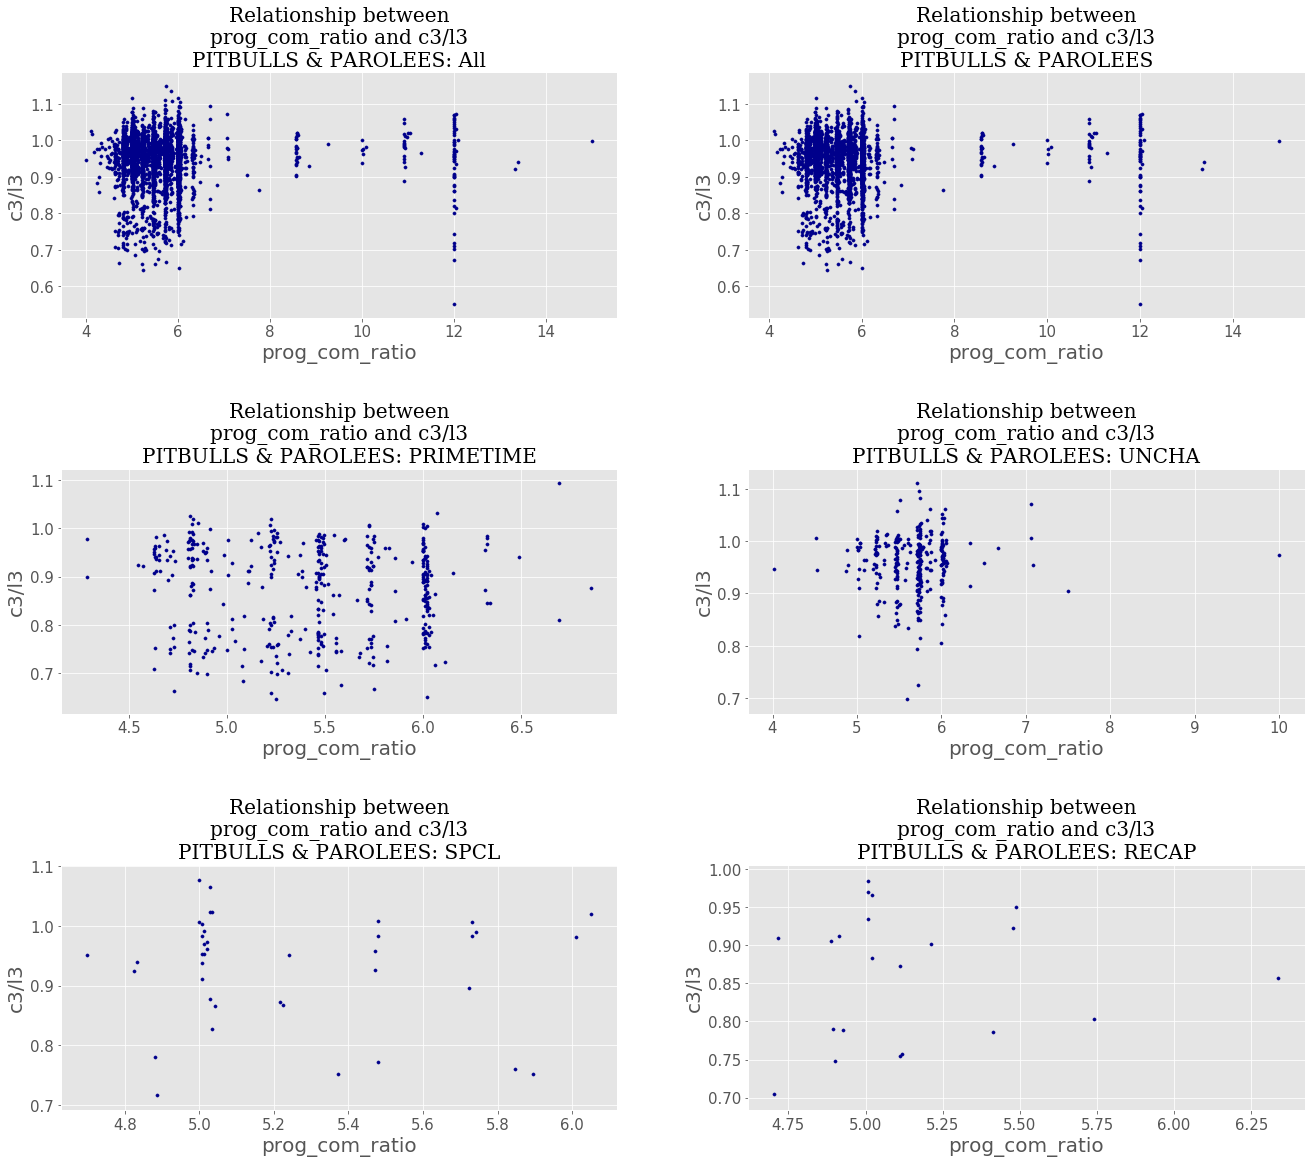

<function __main__.scatter_plot(var1, var2)>

In [51]:
scatter_plot('prog_com_ratio','c3/l3')

Finally, there is no relationship between program-to-commercial ratio and c3/l3. Theoretically, it would mean that even though the ratio can have a positive effect on overall L3 and C3 ratings, it does not necessarily would keep the audience attention during the commercial breaks. This is a premature conclusion, and statistical analyses is required to confirm the effects.   

# Variability in Ratings by Day of the Week, Scheduled Time, Years, and Seasons.

Second, I looked at how ratings change over time, days, and seasons. 

## AA(000)s of L3 & C3 by Day of the Week

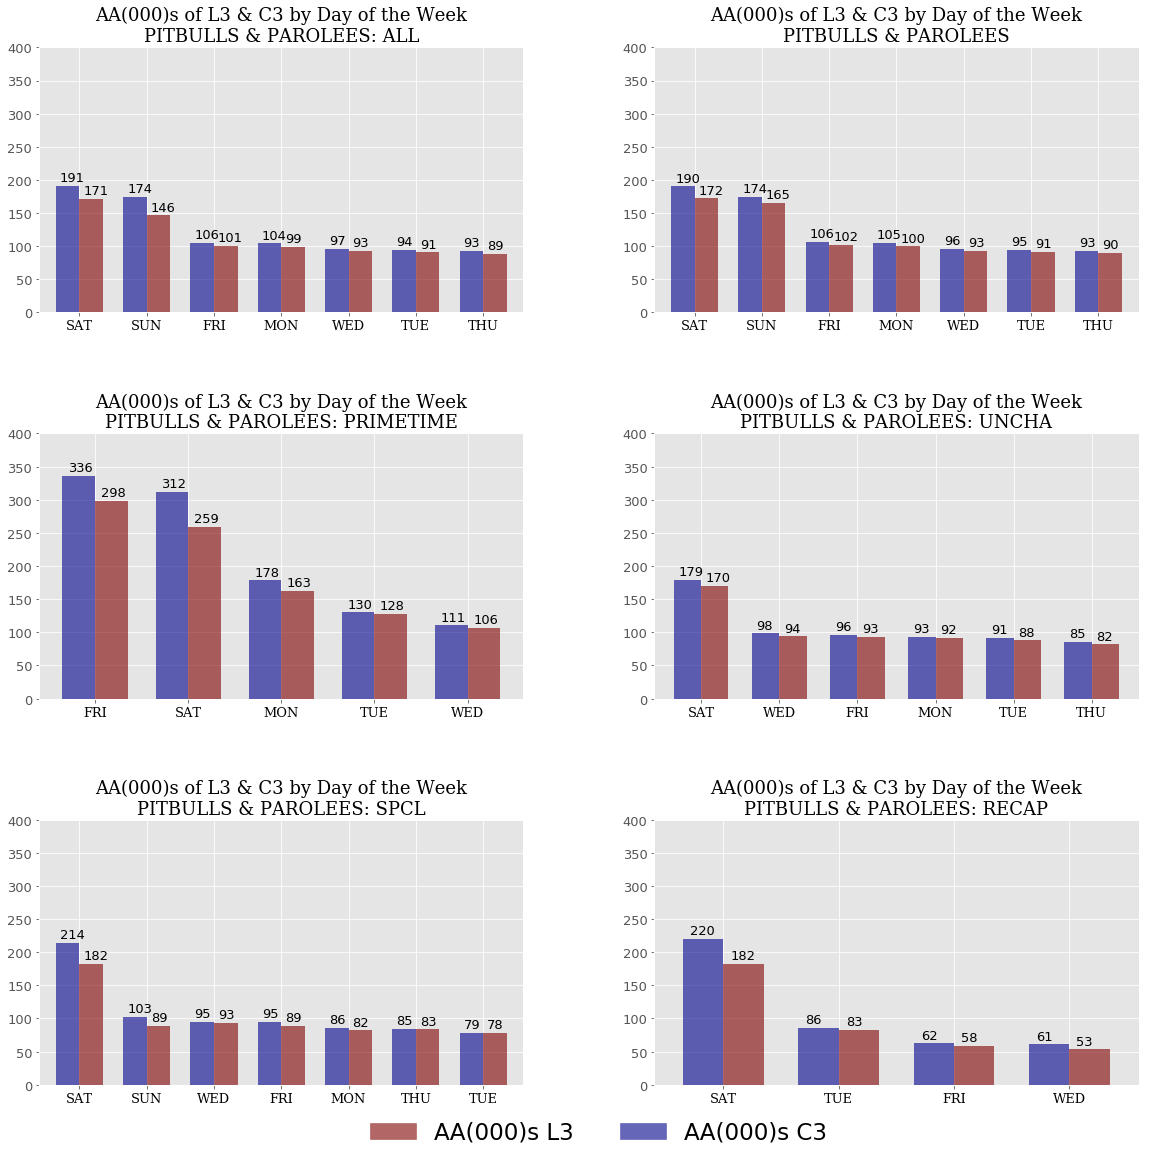

In [52]:
df_ent=df.groupby(['day'])['aa_000s_l3d','aa_000s_c3'].mean()\
.sort_values('aa_000s_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(16,15))
plt.tight_layout(h_pad=10,w_pad=10)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['day'])['aa_000s_l3d','aa_000s_c3'].mean()\
.sort_values('aa_000s_l3d', ascending=False).reset_index()

    df_ent[[ 'aa_000s_l3d','aa_000s_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.06,i.get_height()+7, \
            '{:.0f}'.format(i.get_height()), fontsize=13) 
    ax.set_xticklabels(df_ent['day'],size =13,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,400])
    leg=ax.legend().set_visible(False)
    ax.set_title("AA(000)s of L3 & C3 by Day of the Week\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['AA(000)s L3','AA(000)s C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':23},bbox_to_anchor=(.4, -.3))
leg.legendHandles[1].set_color('DarkBlue')
leg.legendHandles[0].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

Depending on the type of the program, we can observe variability in average audience impressions for L3 & C3 ratings. It looks like for primetime, the highest average audience impressions rating is on Friday and the second highest average audience impressions rating is on Saturdays. For the other type of programs, the ratings are at their highest on Saturdays. 

## National AA% of L3 & C3 by Day of the Week

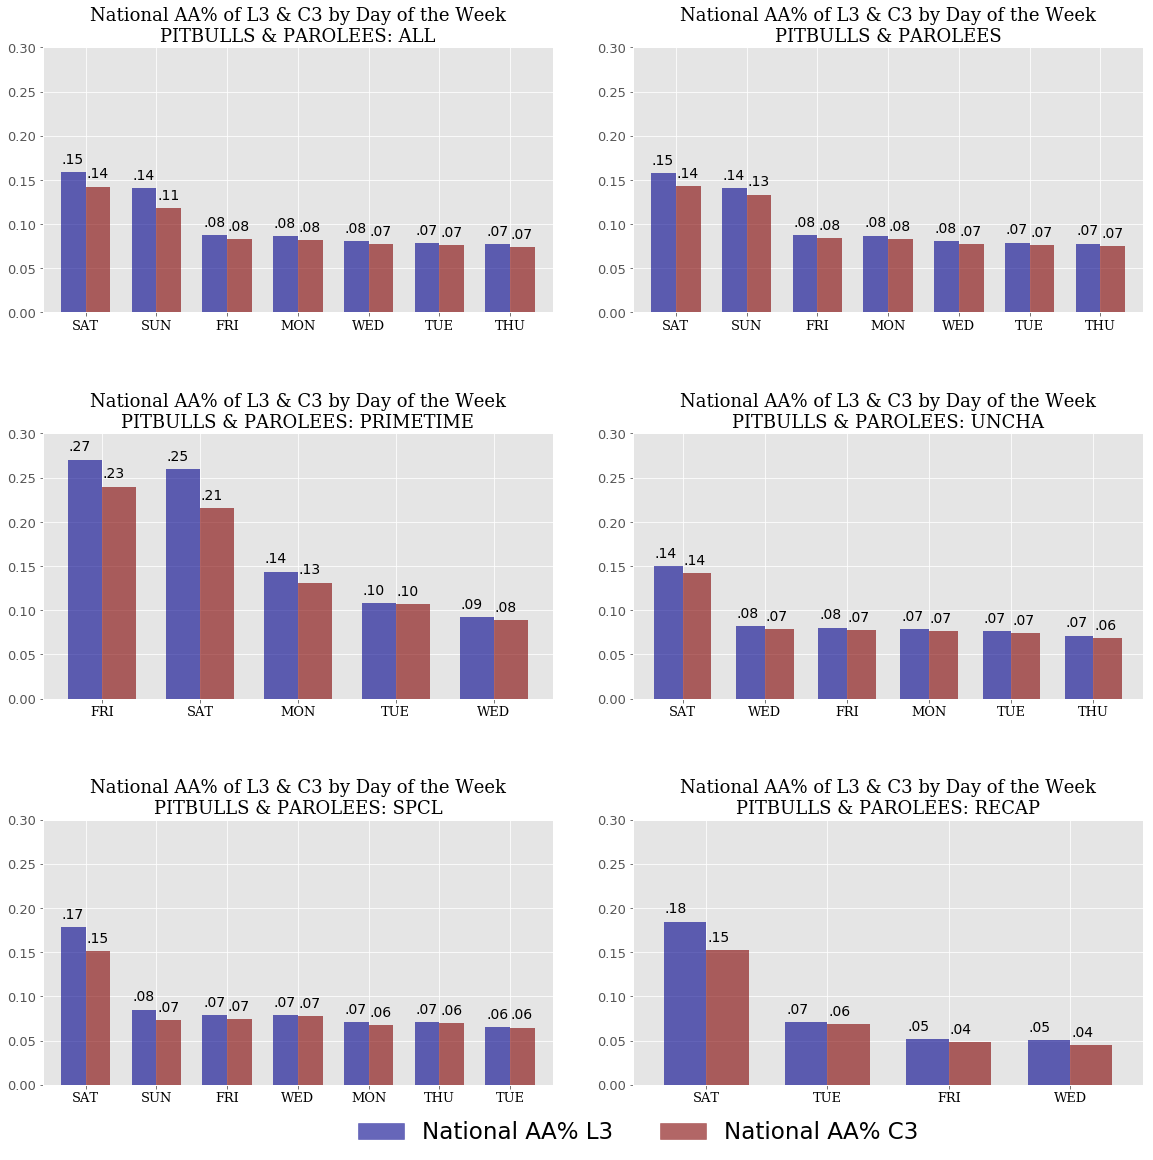

In [53]:
df_ent=df.groupby(['day'])['nat_aa%_l3d','nat_aa%_c3'].mean()\
.sort_values('nat_aa%_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(16,15))
plt.tight_layout(h_pad=10,w_pad=5)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['day'])['nat_aa%_l3d','nat_aa%_c3'].mean()\
.sort_values('nat_aa%_l3d', ascending=False).reset_index()

    df_ent[[ 'nat_aa%_l3d','nat_aa%_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.01,i.get_height()+.01, \
            '{:.4s}'.format(str(i.get_height())).lstrip('0'),fontsize=14)
    ax.set_xticklabels(df_ent['day'],size =13,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,.3])
    leg=ax.legend().set_visible(False)
    ax.set_title("National AA% of L3 & C3 by Day of the Week\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['National AA% L3','National AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':23},bbox_to_anchor=(.6, -.3))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

Exactly the same trend as above can be observed for national average audience L3 and C3 ratings but the ratings are very close for primetime on Fridays and Saturdays.

## Coverage AA% of L3 & C3 by Day of the Week

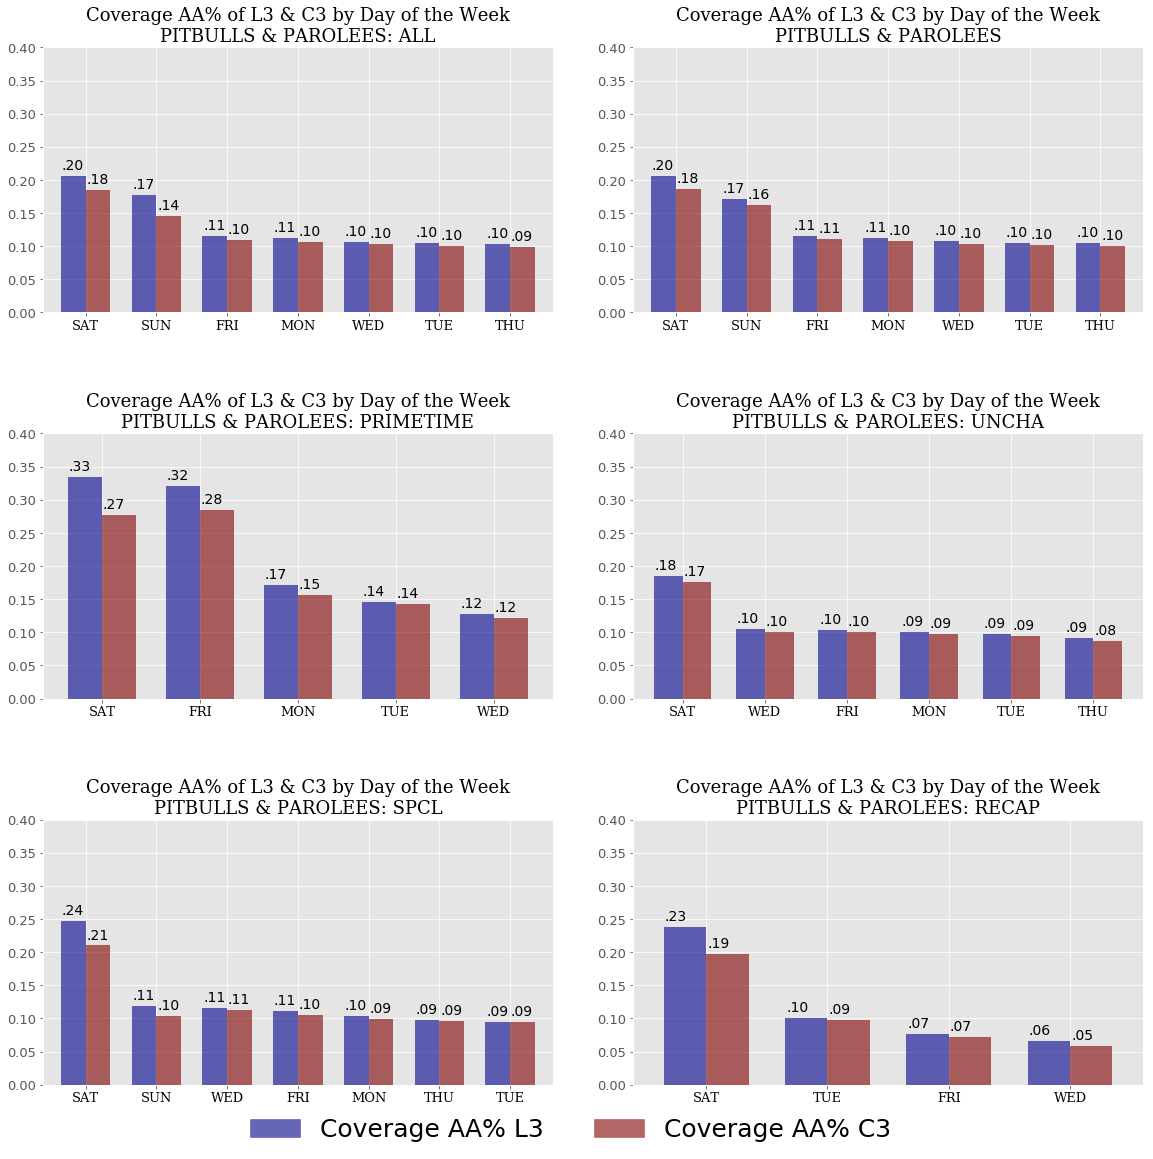

In [54]:
df_ent=df.groupby(['day'])['cvg_aa%_l3d','cvg_aa%_c3'].mean()\
.sort_values('cvg_aa%_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(16,15))
plt.tight_layout(h_pad=10,w_pad=5)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['day'])['cvg_aa%_l3d','cvg_aa%_c3'].mean()\
.sort_values('cvg_aa%_l3d', ascending=False).reset_index()

    df_ent[[ 'cvg_aa%_l3d','cvg_aa%_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.01,i.get_height()+.01, \
            '{:.4s}'.format(str(i.get_height())).lstrip('0'),fontsize=14)
    ax.set_xticklabels(df_ent['day'],size =13,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,.4])
    leg=ax.legend().set_visible(False)
    ax.set_title("Coverage AA% of L3 & C3 by Day of the Week\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['Coverage AA% L3','Coverage AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':25},bbox_to_anchor=(.55, -.3))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

Finally, coverage average audience L3 and C3 ratings for primetime repeats the same pattern as it exists for the other types of the programs; that’s they are higher on Saturdays than Fridays (although, their numeric values are pretty close to each other).   

## C3/L3 by Day of the Week

In [55]:
def bar_chart_by_day(rating,ylim=[0,.5]):
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,15))
    plt.tight_layout(h_pad=10,w_pad=10)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        df_ent=dfx.groupby(['day'])[rating].mean().to_frame()
        df_ent.reset_index(inplace=True)
        df_entered=df_ent.sort_values(rating,ascending=False )
        pos = list(range(len(df_entered['day'])))
        if name =='PITBULLS & PAROLEES: RECAP':
            days=list(df_entered['day'])
            days.insert(0,' ')
            days.insert(1,' ')
            days.insert(3,' ')
            days.insert(5,' ')
            days.insert(7,' ')
        else:
            days=list(df_entered['day'])
            days.insert(0,' ')
        ax.set_ylim(ylim)
        ax.bar(pos, df_entered[rating],alpha=.7,align="center",color='DarkBlue')
        ax.set_xticklabels(days, size =15,family="serif")
        for i, label in enumerate(list(df_entered.index)):
            score = df_entered.loc[label][1].round(2)
            ax.annotate(str(score), (i, score + .05),ha='center', size=15)
        ax.set_title(rating + " by Day of the Week\n"+ name,x=.5, fontsize=20,family='serif')

    plt.show()
    return bar_chart_by_day
    
    
    


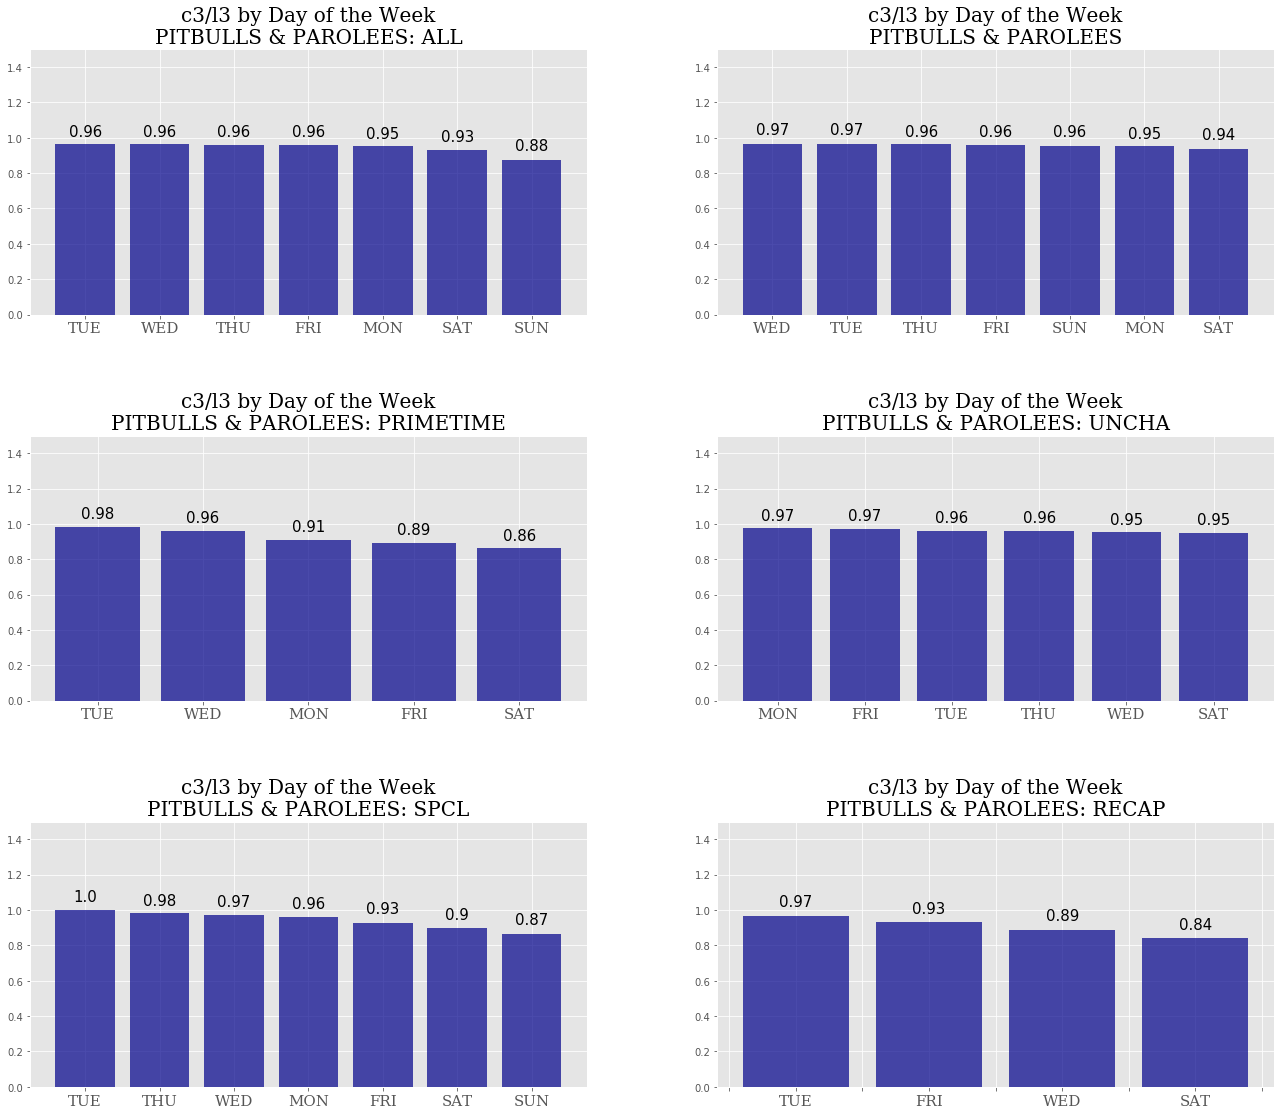

<function __main__.bar_chart_by_day(rating, ylim=[0, 0.5])>

In [56]:
bar_chart_by_day('c3/l3',ylim=[0,1.5])

An interesting pattern is revealed by looking at C3/L3 by the day of the week. It looks like the audience just hates watching commercials on weekends and more likely to either fast forward commercials or switch to a different channel on Saturdays and Sundays. This pattern is especially apparent for prime-time, specials, and recaps where we can see the ratio at its lowest.  

## Time Serties of AA(000)s for L3 & C3 

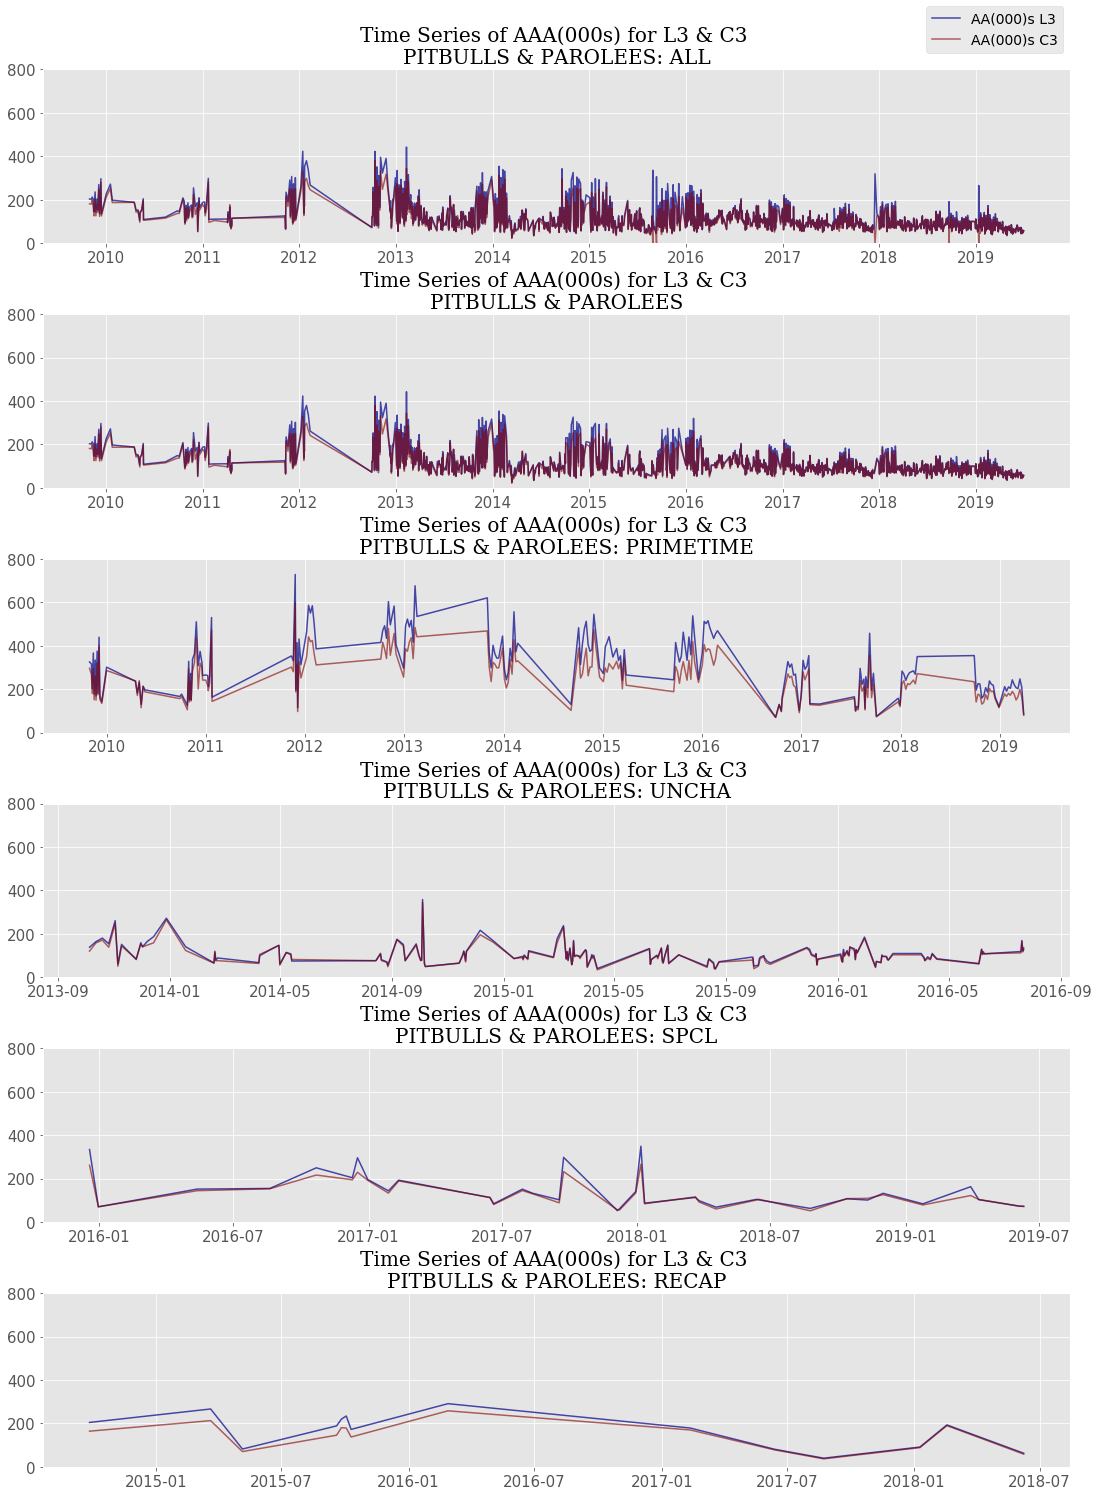

In [57]:
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=6, figsize=(15,20))
    plt.tight_layout(h_pad=5)
    plt.style.use('ggplot')
    
    for ax,dfx,name in zip(axes.flat,data, names):
        df_entered = dfx.groupby(['date'])[['aa_000s_l3d','aa_000s_c3']].mean().reset_index()
        df_entered.reset_index(inplace=True)
        df_entered['date'] =pd.to_datetime(df_entered.date)
        dfw=df_entered.sort_values(by='date')
        ax.plot(dfw['date'], dfw['aa_000s_l3d'], color='DarkBlue',alpha=.7)
        ax.plot(dfw['date'], dfw['aa_000s_c3'], color='maroon', alpha=.6)
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.set_ylim([0,800])
        ax.set_title("Time Series of AAA(000s) for L3 & C3 \n"+ name,x=.5, fontsize=20,family='serif')
    leg=ax.legend(['AA(000)s L3','AA(000)s C3'],  ncol=1,loc='lower right', \
          fontsize=12,prop={'size':14},bbox_to_anchor=(1, 8.1))

When it comes to ratings patterns throughout the years, an interesting insight emerges from looking at primetime ratings. They seemed to pick in 2013 and have been slightly declining since. There is more stability among other program types and their ratings don’t reveal any apparent declines or increases.

## Time Serties of National AA% for  L3 & C3 

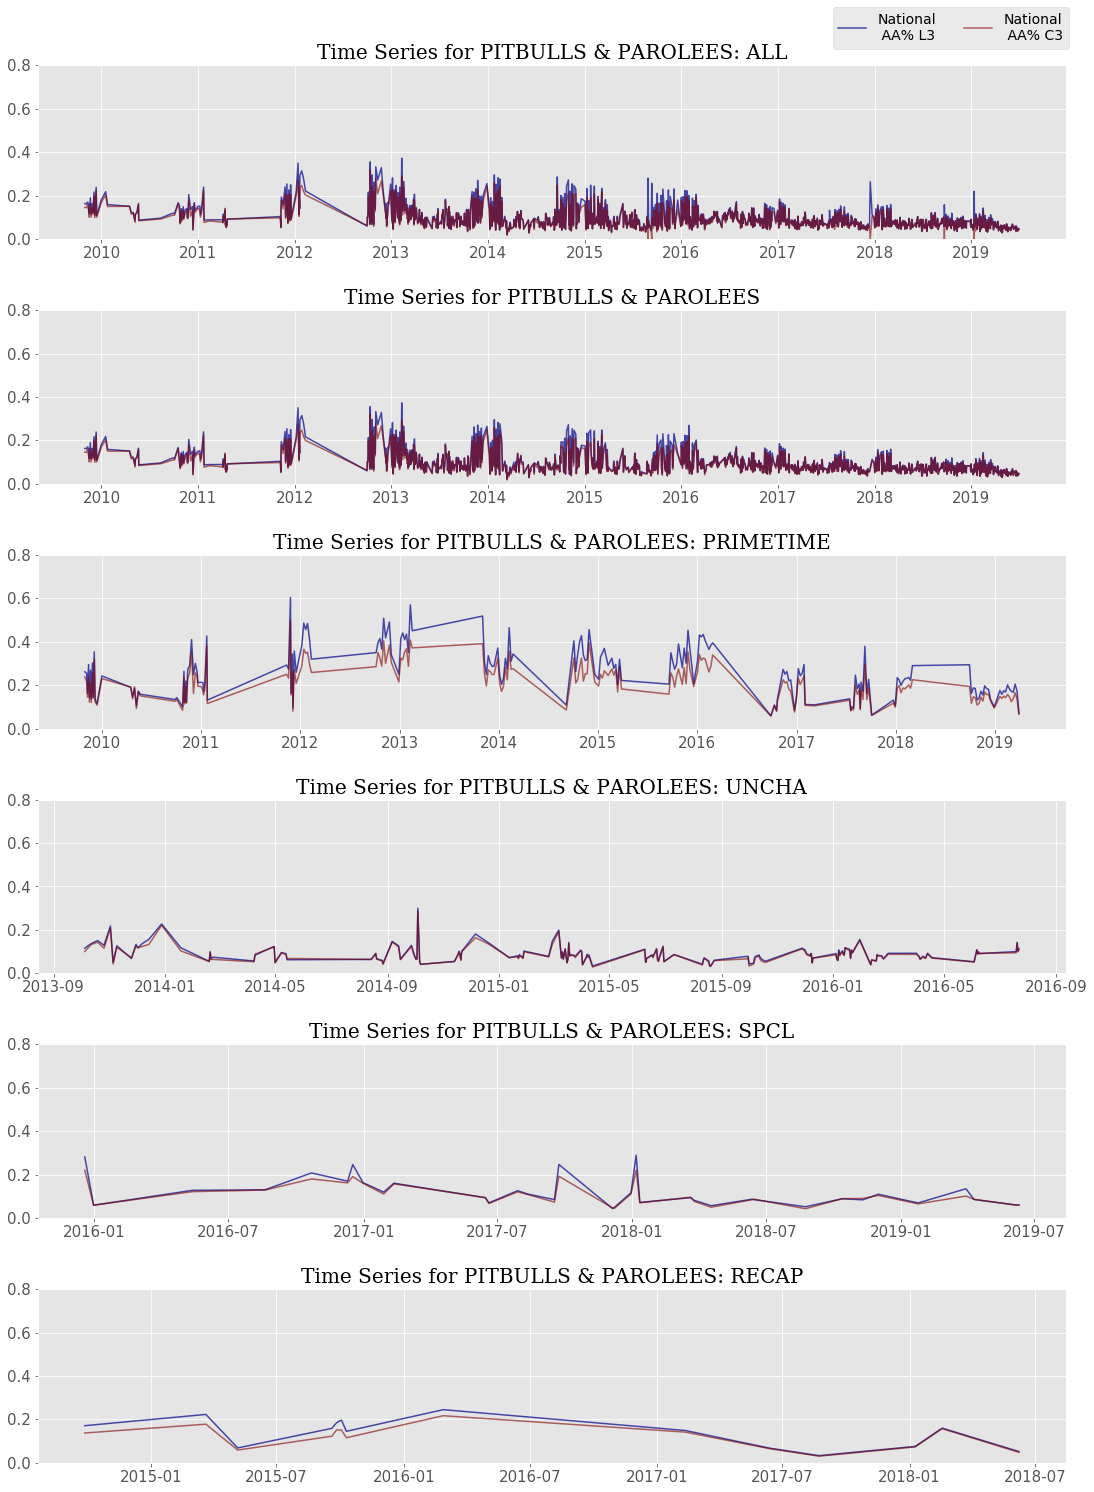

In [58]:
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=6, figsize=(15,20))
    plt.tight_layout(h_pad=5)
    plt.style.use('ggplot')
    
    for ax,dfx,name in zip(axes.flat,data, names):
        df_entered = dfx.groupby(['date'])['nat_aa%_l3d','nat_aa%_c3'].mean().reset_index()
        df_entered.reset_index(inplace=True)
        df_entered['date'] =pd.to_datetime(df_entered.date)
        dfw=df_entered.sort_values(by='date')
        ax.plot(dfw['date'], dfw['nat_aa%_l3d'], color='DarkBlue',alpha=.7)
        ax.plot(dfw['date'], dfw['nat_aa%_c3'], color='maroon', alpha=.6)
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.set_ylim([0,.8])
        ax.set_title("Time Series for "+ name,x=.5, fontsize=20,family='serif')
    leg=ax.legend(['National\n AA% L3','National\n AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':14},bbox_to_anchor=(1.01, 8.1))

The same pattern is observed with national average audience L3 and C3 ratings.

## Time Serties of Coverage AA% for  L3 & C3 

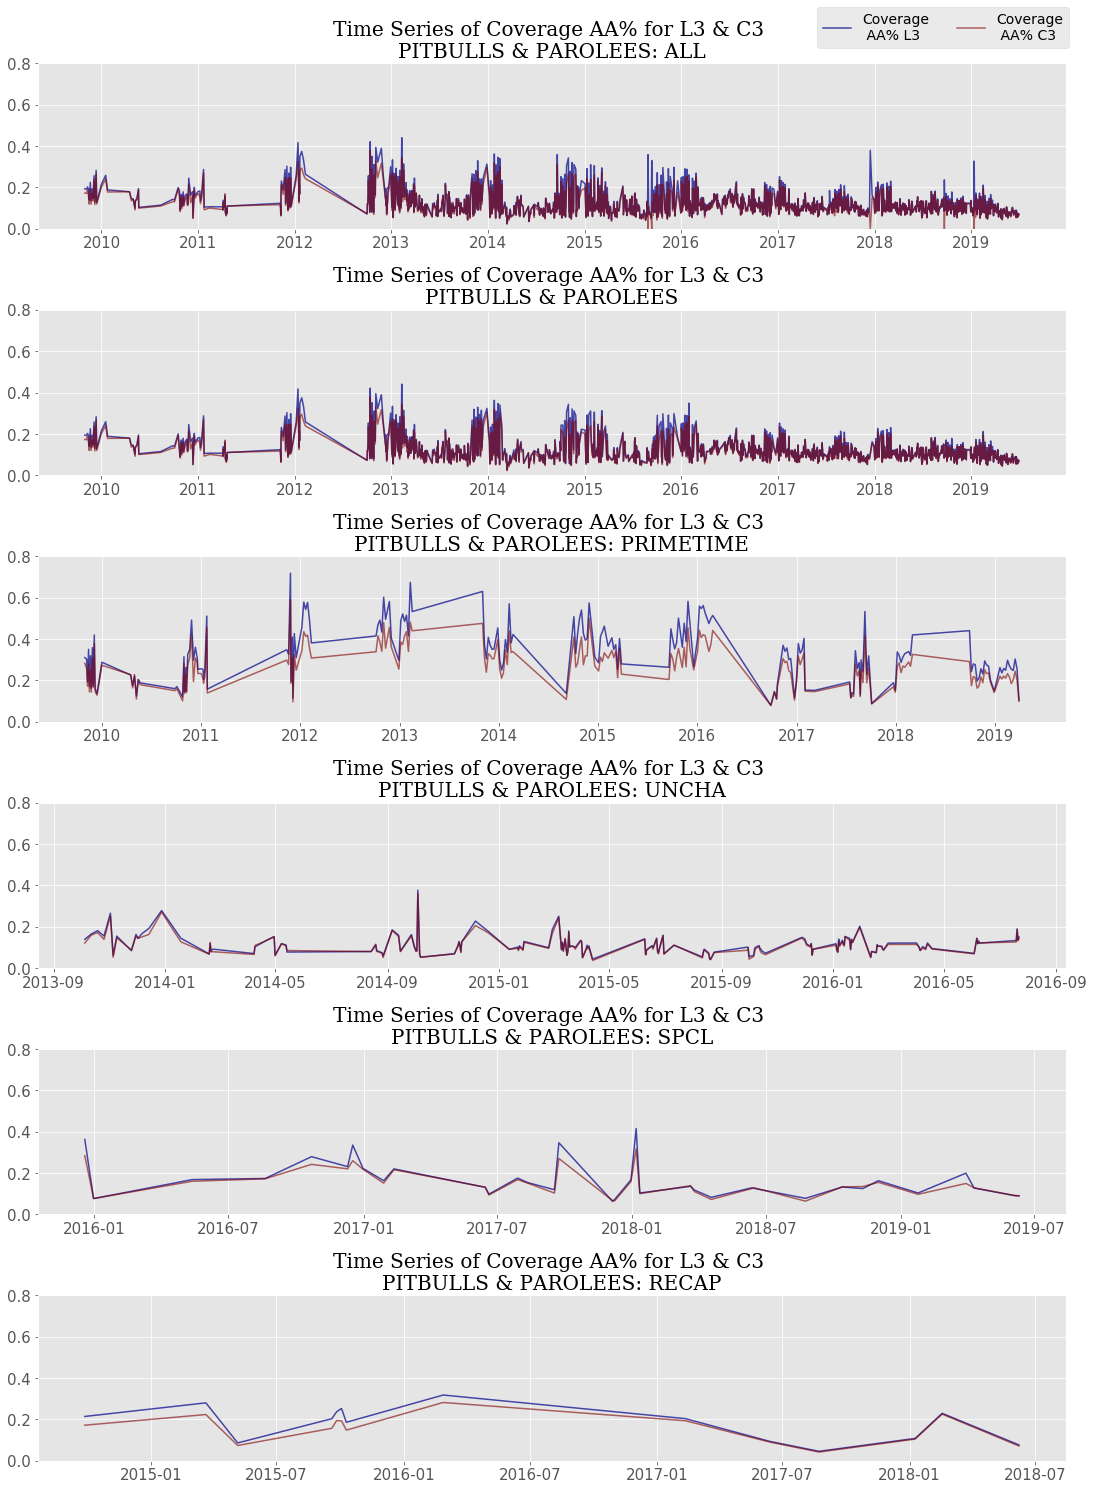

In [59]:
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=6, figsize=(15,20))
    plt.tight_layout(h_pad=6)
    plt.style.use('ggplot')
    
    for ax,dfx,name in zip(axes.flat,data, names):
        df_entered = dfx.groupby(['date'])['cvg_aa%_l3d','cvg_aa%_c3'].mean().reset_index()
        df_entered.reset_index(inplace=True)
        df_entered['date'] =pd.to_datetime(df_entered.date)
        dfw=df_entered.sort_values(by='date')
        ax.plot(dfw['date'], dfw['cvg_aa%_l3d'], color='DarkBlue',alpha=.7)
        ax.plot(dfw['date'], dfw['cvg_aa%_c3'], color='maroon', alpha=.6)
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.set_ylim([0,.8])
        ax.set_title("Time Series of Coverage AA% for L3 & C3 \n"+ name,x=.5, fontsize=20,family='serif')
    leg=ax.legend(['Coverage\n AA% L3','Coverage\n AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':14},bbox_to_anchor=(1.01, 8.5))

And again the same pattern is observed with coverage average audience L3 and C3 ratings.

## Time Serties of Coverage AA% for  L3 & C3 

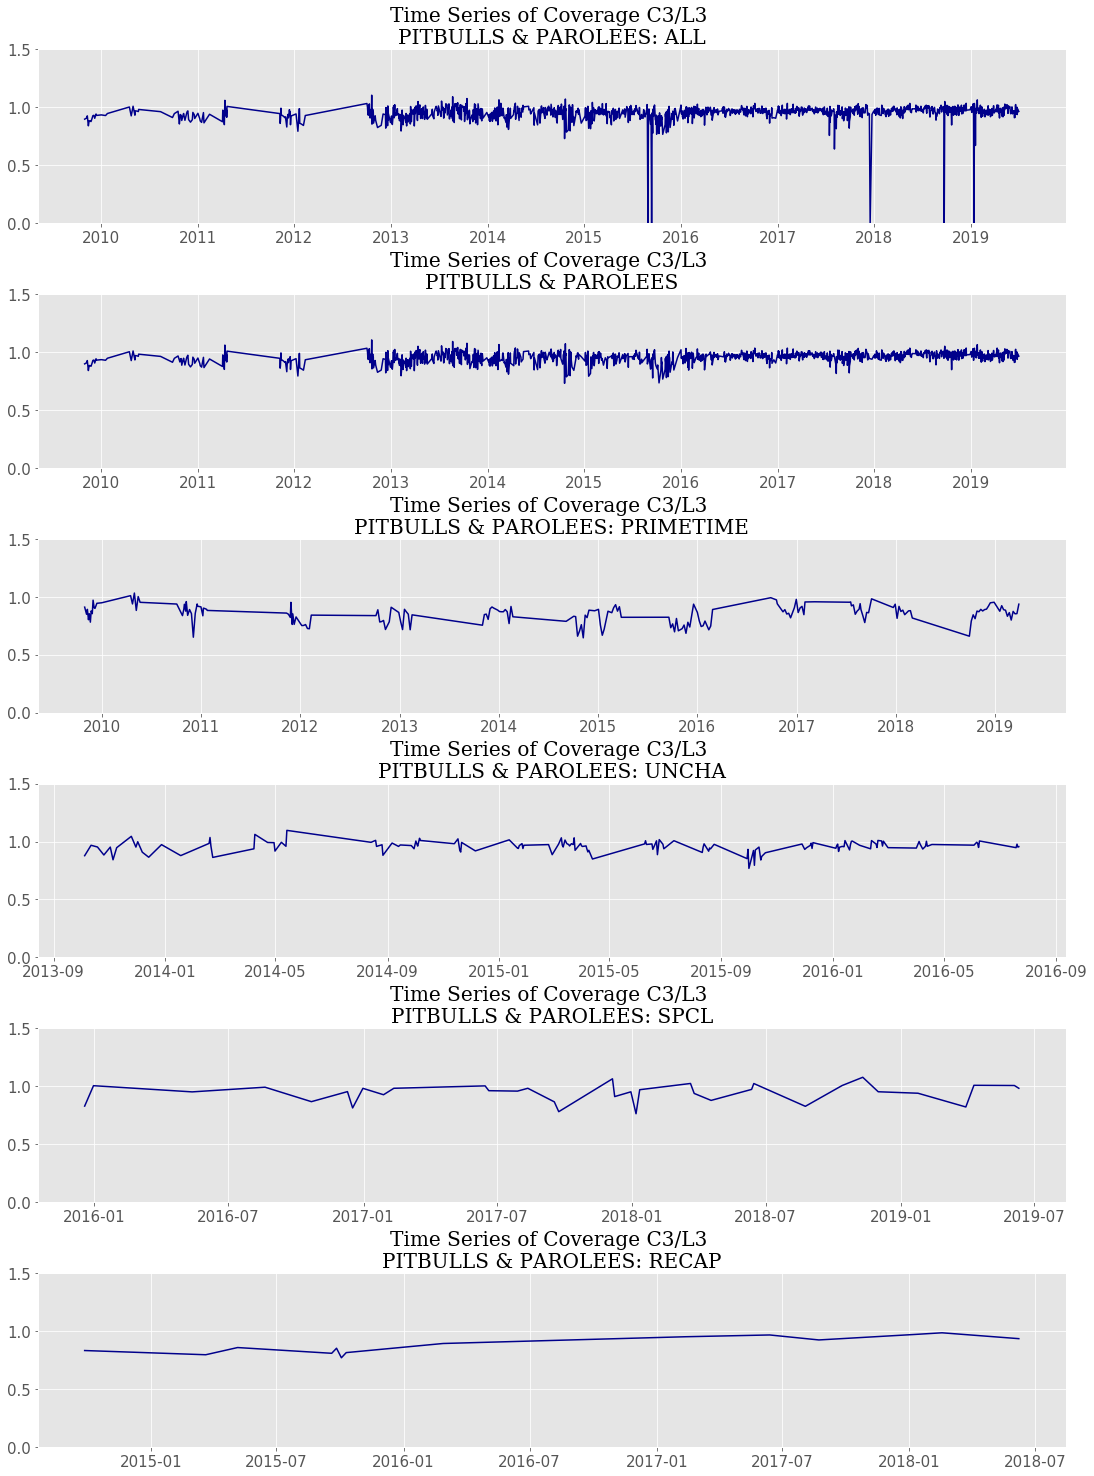

In [60]:
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    
    plt.rcParams["axes.labelsize"] = 20
    fig, axes = plt.subplots(nrows=6, figsize=(15,20))
    plt.tight_layout(h_pad=5)
    plt.style.use('ggplot')
    
    for ax,dfx,name in zip(axes.flat,data, names):
        df_entered = dfx.groupby(['date'])['c3/l3'].mean().to_frame('mean')
        df_entered.reset_index(inplace=True)
        df_entered['date'] =pd.to_datetime(df_entered.date)
        dfw=df_entered.sort_values(by='date')
        ax.plot(dfw['date'], dfw['mean'], color='DarkBlue')
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)
        ax.set_ylim([0,1.5])
        ax.set_title("Time Series of Coverage C3/L3 \n"+ name,x=.5, fontsize=20,family='serif')
    plt.show()

Finally, there is practically no apparent fluctuations in C3/L3 throughout years, indicating that C3/L3 is not likely to be affected by time. Note: the zero ratings observed in the first graph is coming from sneak peaks discussed and shown above.  

## AA(000)s of L3 & C3 by Prime Time

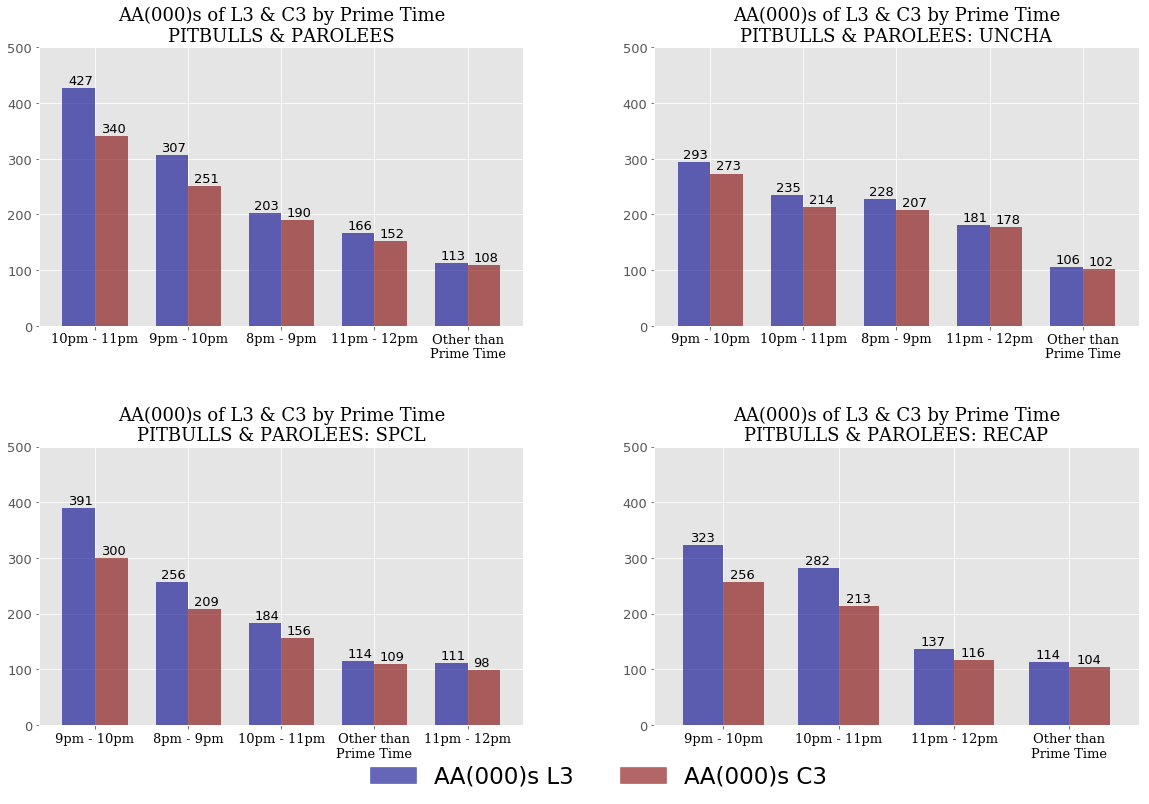

In [61]:
df_ent=df.groupby(['prime_time'])['aa_000s_l3d','aa_000s_c3'].mean()\
.sort_values('aa_000s_l3d', ascending=False).reset_index()
data=[df_pp, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES',
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,10))
plt.tight_layout(h_pad=10,w_pad=10)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['prime_time'])['aa_000s_l3d','aa_000s_c3'].mean()\
.sort_values('aa_000s_l3d', ascending=False).reset_index()

    df_ent[[ 'aa_000s_l3d','aa_000s_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.06,i.get_height()+7, \
            '{:.0f}'.format(i.get_height()), fontsize=13) 
    ax.set_xticklabels(df_ent['prime_time'],size =13,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,500])
    leg=ax.legend().set_visible(False)
    ax.set_title("AA(000)s of L3 & C3 by Prime Time\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['AA(000)s L3','AA(000)s C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':23},bbox_to_anchor=(.4, -.3))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

The average audience impressions for L3 and C3 are highest between 10pm-11pm and 9pm-10pm, which makes total sense as the show premieres at those times.  However, for specials the highest rating is between 9pm-10pm and 8pm-9pm. Possibly, because that's when specials are more likely to be aired.

## National AA% of L3 & C3 by Prime Time

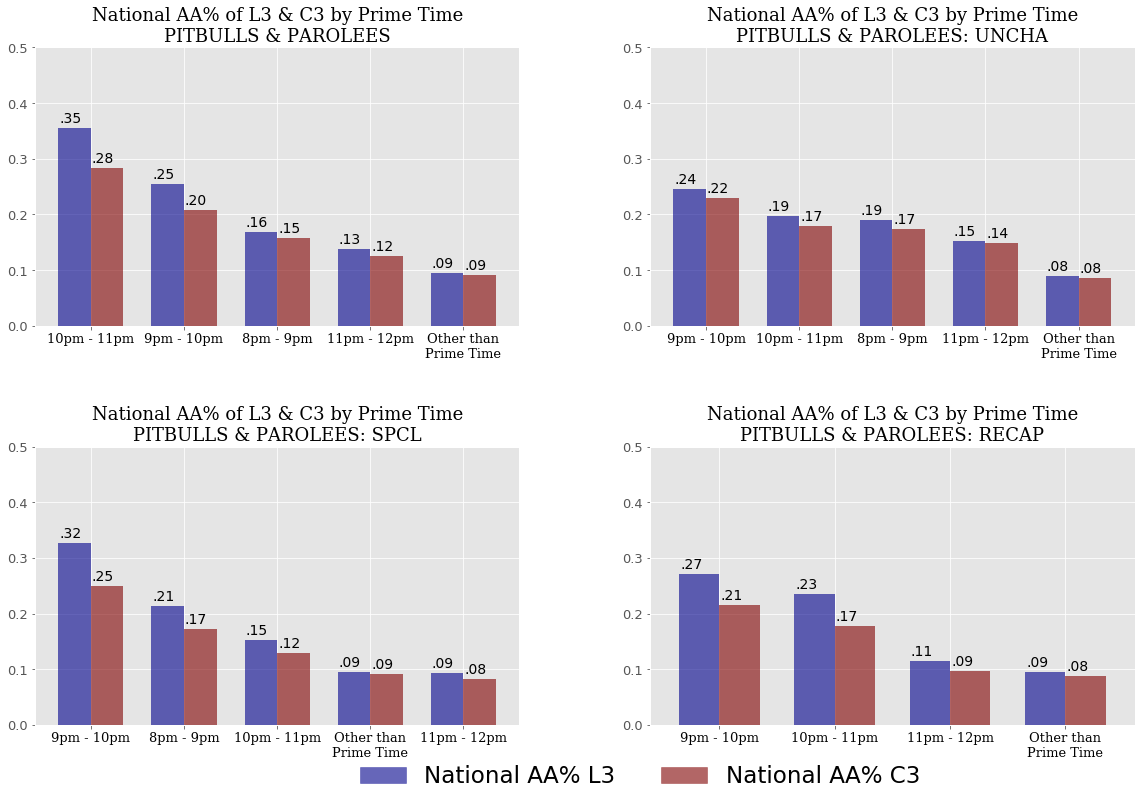

In [62]:
df_ent=df.groupby(['prime_time'])['nat_aa%_l3d','nat_aa%_c3'].mean()\
.sort_values('nat_aa%_l3d', ascending=False).reset_index()
data=[df_pp, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES',
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,10))
plt.tight_layout(h_pad=10,w_pad=10)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['prime_time'])['nat_aa%_l3d','nat_aa%_c3'].mean()\
.sort_values('nat_aa%_l3d', ascending=False).reset_index()

    df_ent[['nat_aa%_l3d','nat_aa%_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.01,i.get_height()+.01, \
            '{:.4s}'.format(str(i.get_height())).lstrip('0'),fontsize=14)
    ax.set_xticklabels(df_ent['prime_time'],size =13,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,.5])
    leg=ax.legend().set_visible(False)
    ax.set_title("National AA% of L3 & C3 by Prime Time\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['National AA% L3','National AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':23},bbox_to_anchor=(.6, -.3))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

Identical pattern emerges for national average audience ratings. 

## Coverage AA% of L3 & C3 by Prime Time

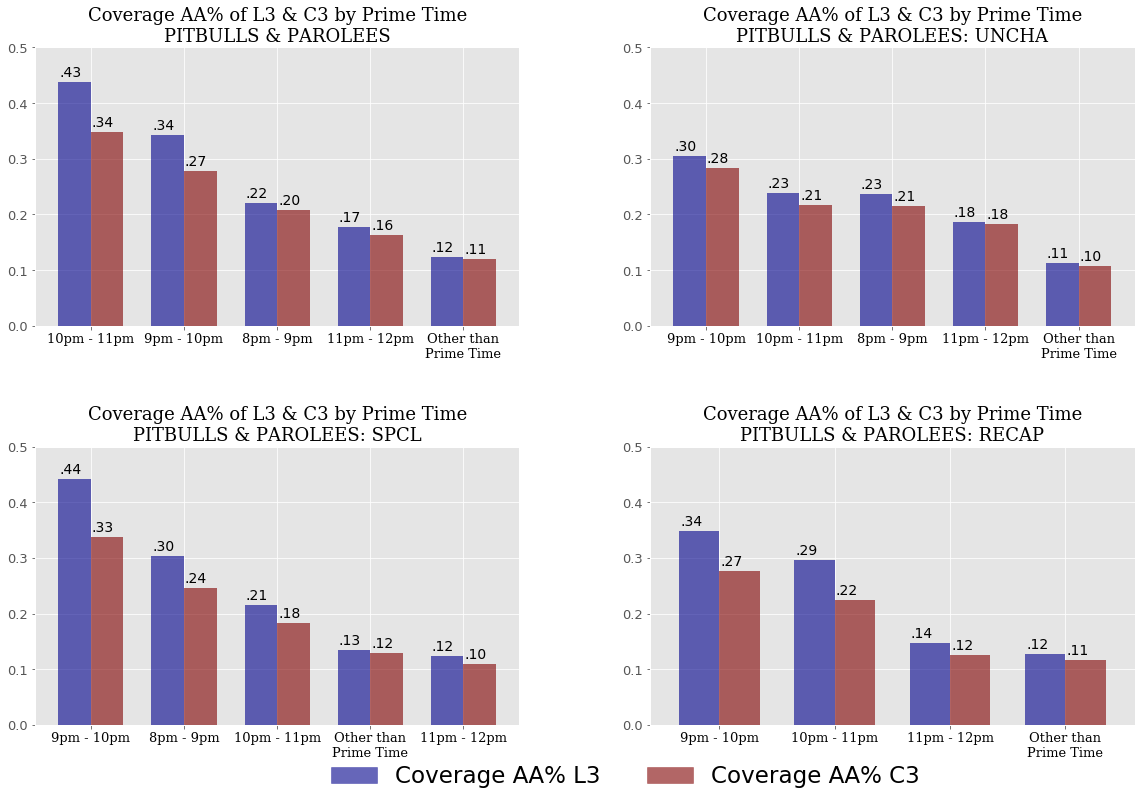

In [63]:
df_ent=df.groupby(['prime_time'])['cvg_aa%_l3d','cvg_aa%_c3'].mean()\
.sort_values('cvg_aa%_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
data=[df_pp, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES',
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,10))
plt.tight_layout(h_pad=10,w_pad=10)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['prime_time'])['cvg_aa%_l3d','cvg_aa%_c3'].mean()\
.sort_values('cvg_aa%_l3d', ascending=False).reset_index()

    df_ent[['cvg_aa%_l3d','cvg_aa%_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.01,i.get_height()+.01, \
            '{:.4s}'.format(str(i.get_height())).lstrip('0'),fontsize=14)
    ax.set_xticklabels(df_ent['prime_time'],size =13,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,.5])
    leg=ax.legend().set_visible(False)
    ax.set_title("Coverage AA% of L3 & C3 by Prime Time\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['Coverage AA% L3','Coverage AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':23},bbox_to_anchor=(.6, -.3))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

Finally, we can see identical pattern for coverage average audience ratings.

## C3/L3 by Prime Time

In [64]:
def bar_chart_by_time(rating, ylim=[0,.5]):
    data=[df_pp, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES',
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
    plt.tight_layout(h_pad=10,w_pad=10)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        df_ent=dfx.groupby(['prime_time'])[rating].mean().to_frame()
        df_ent.reset_index(inplace=True)
        df_entered=df_ent.sort_values(rating,ascending=False )
        pos = list(range(len(df_entered['prime_time'])))
        time=list(df_entered['prime_time'])
        if name =='PITBULLS & PAROLEES: PRIME TIME' or name =='PITBULLS & PAROLEES: RECAP':
            time.insert(0,' ')
            time.insert(2,' ')
            time.insert(4,' ')
            time.insert(6,' ')
        else:
            time.insert(0,' ')
        ax.bar(pos, df_entered[rating],alpha=.7,align="center",color='DarkBlue',width=0.5)
        ax.set_xticklabels(time, size=15)
        for i, label in enumerate(list(df_entered.index)):
            score = df_entered.loc[label][1].round(2)
            ax.annotate(str(score), (i, score + 0.01),ha='center', size=15)
        ax.set_title(rating +" by Time for\n"+ name,x=.5, fontsize=20,family='serif')
        ax.set_ylim(ylim)
    plt.show()
    return bar_chart_by_time

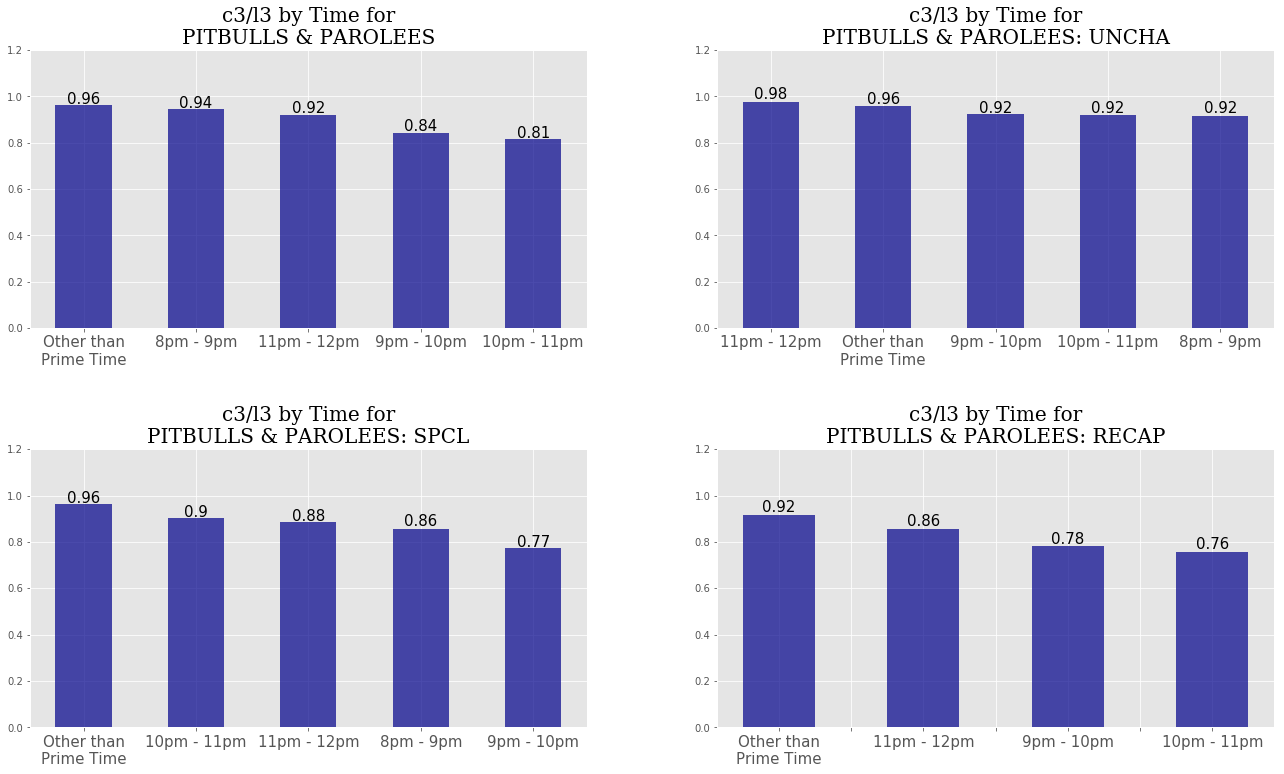

<function __main__.bar_chart_by_time(rating, ylim=[0, 0.5])>

In [65]:
bar_chart_by_time("c3/l3", ylim=[0,1.2])

Again, we see the same interesting pattern for C3/L3 ratio as we have seen earlier on Saturdays. The audience is less likely to watch commercials during premiers, that is between 9pm and 10pm, and also between 10pm and 11pm. Again, C3/L3 reflects audience inclination to stick to commercials during the show, and it looks like they want to switch to different channels or fast-forward commercials during the premiers and primetimes, and that’s the time where advertisers hope that their commercials have a greater impact on the audience.  

## AA(000)s of L3 & C3 by Season

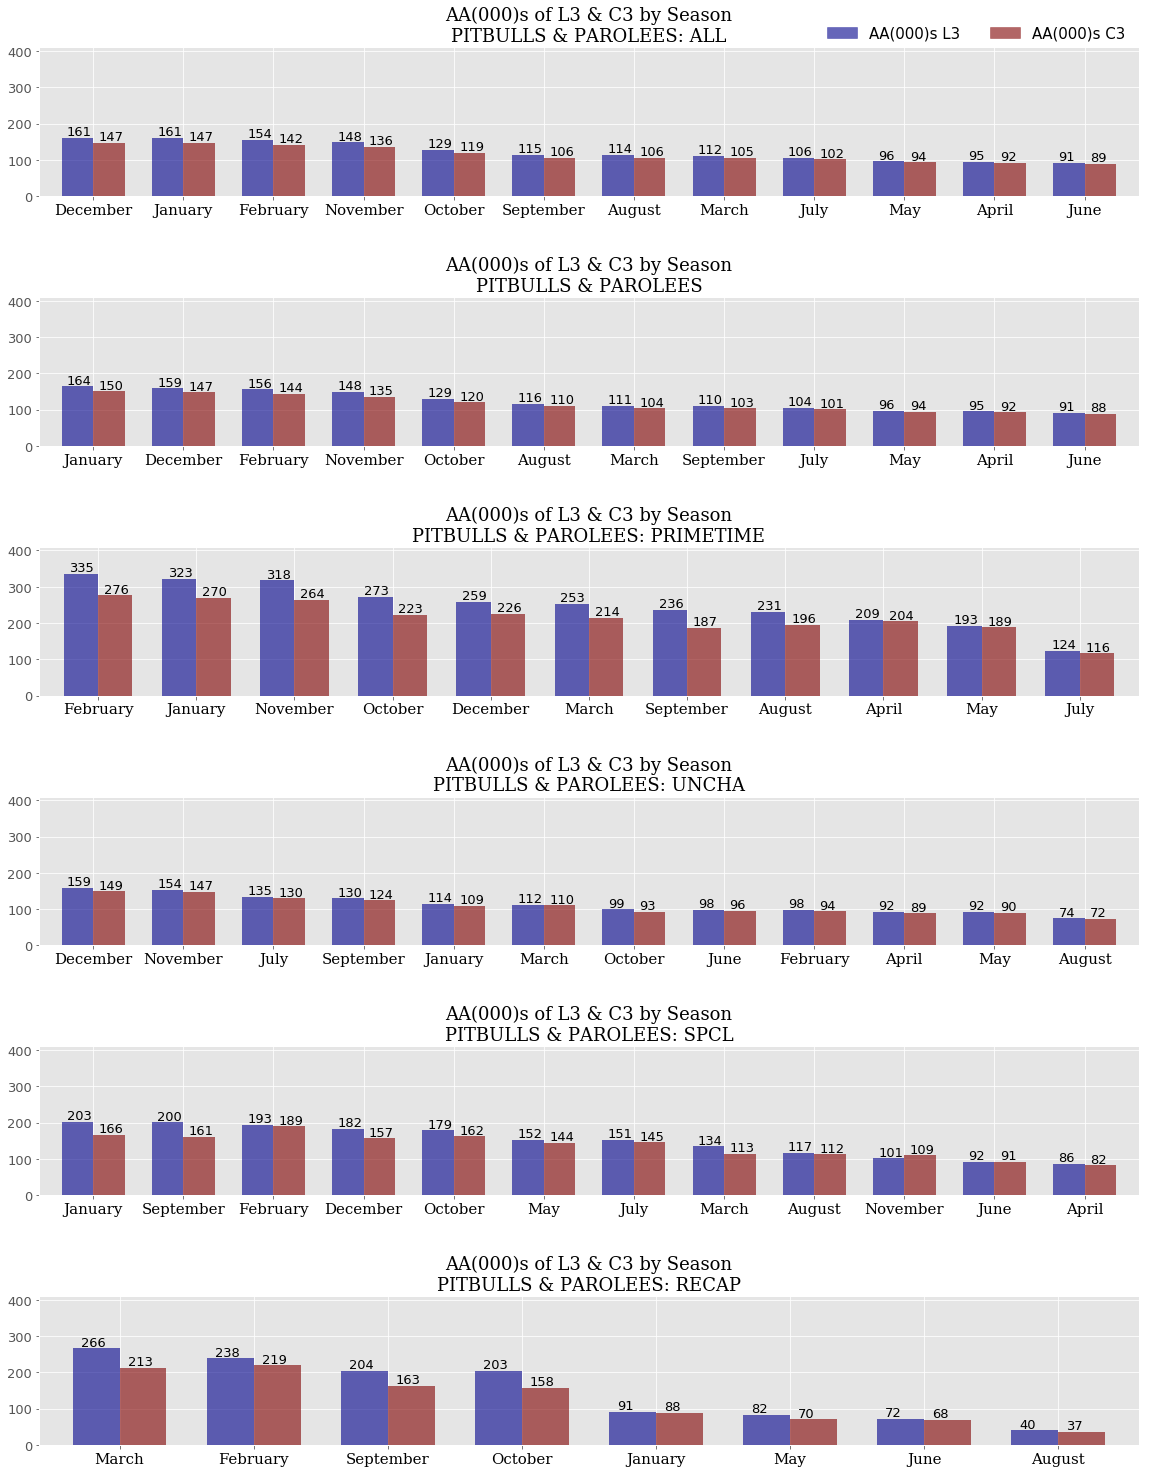

In [66]:
df_ent=df.groupby(['month'])['aa_000s_l3d','aa_000s_c3'].mean()\
.sort_values('aa_000s_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=6,figsize=(16,20))
plt.tight_layout(h_pad=8)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['month'])['aa_000s_l3d','aa_000s_c3'].mean()\
.sort_values('aa_000s_l3d', ascending=False).reset_index()

    df_ent[[ 'aa_000s_l3d','aa_000s_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.06,i.get_height()+7, \
            '{:.0f}'.format(i.get_height()), fontsize=13) 
    ax.set_xticklabels(df_ent['month'],size =15,family='serif', color='black',rotation='horizontal')
    ax.set_ylim([0,410])
    leg=ax.legend().set_visible(False)
    ax.set_title("AA(000)s of L3 & C3 by Season\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['AA(000)s L3','AA(000)s C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':15},bbox_to_anchor=(1, 9.35))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

The average audience impressions for L3 and C3 for Pitbulls & Parolees are at their highest during the months of January, December, and February but it is a bit different for primetime, where the ratings at their highest in February, January, and November. In general, the ratings at the highest during the winter and the lowest during the summer.

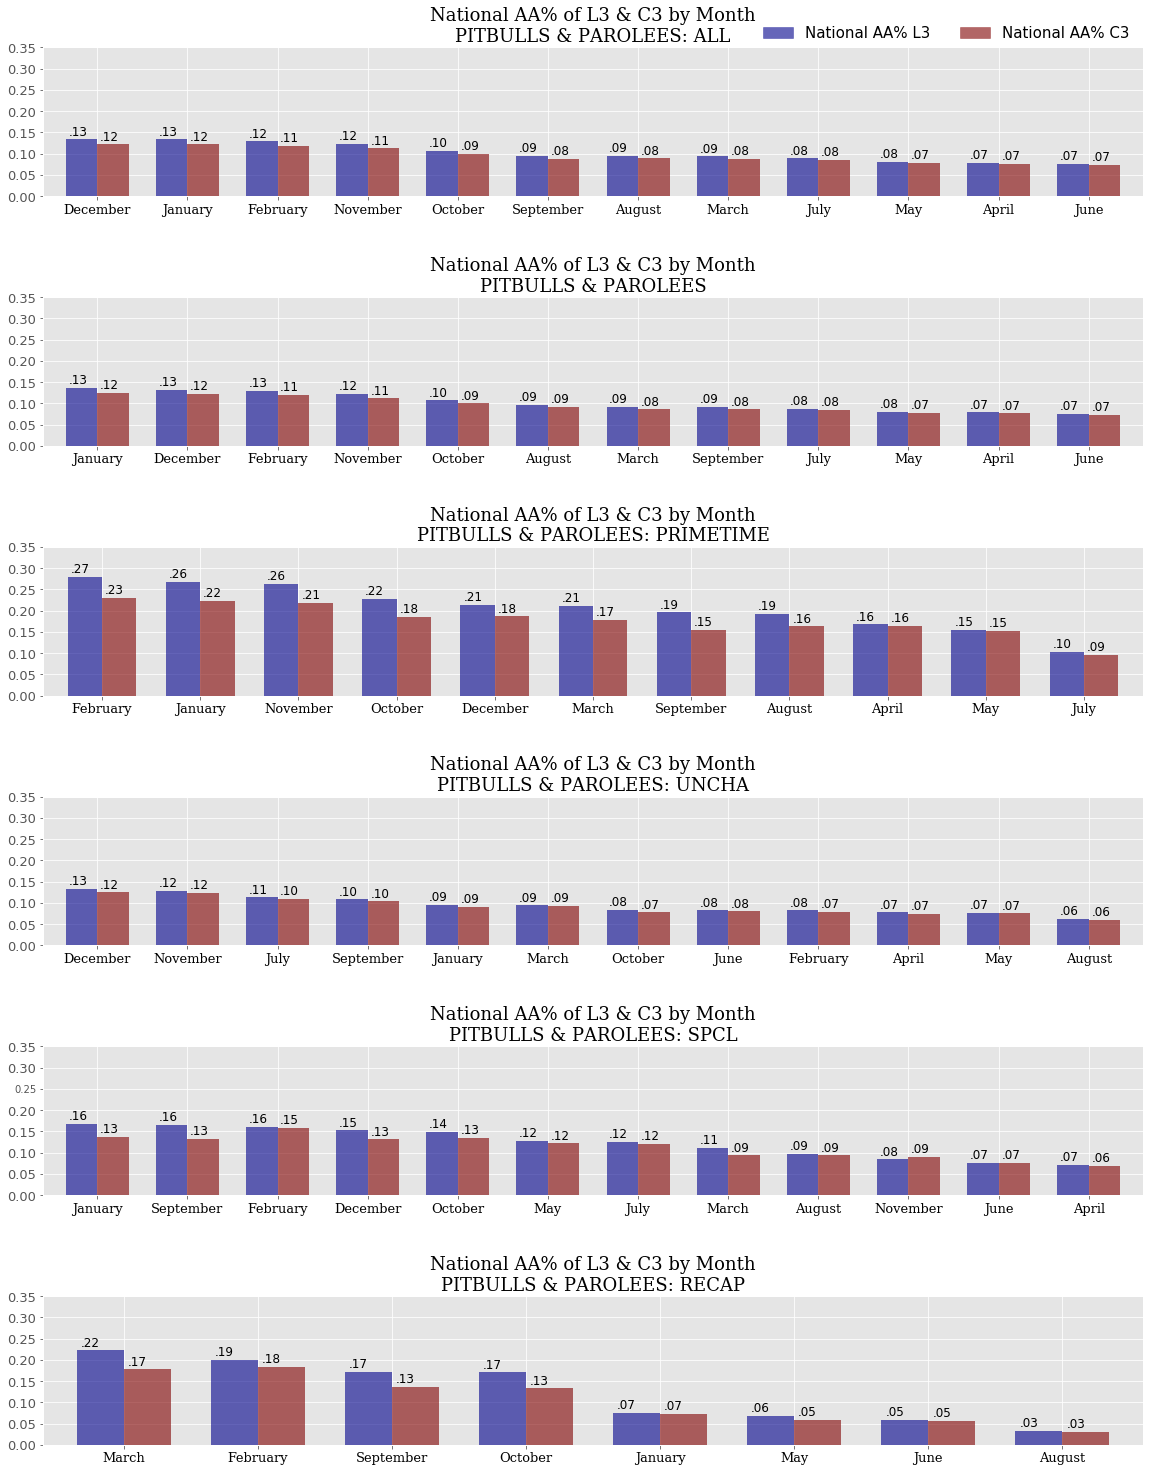

In [67]:
df_ent=df.groupby(['month'])['nat_aa%_l3d','nat_aa%_c3'].mean()\
.sort_values('nat_aa%_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=6, figsize=(16,20))
plt.tight_layout(h_pad=8)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['month'])['nat_aa%_l3d','nat_aa%_c3'].mean()\
.sort_values('nat_aa%_l3d', ascending=False).reset_index()

    df_ent[[ 'nat_aa%_l3d','nat_aa%_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text( i.get_x()+.03,i.get_height()+.01, \
            '{:.4s}'.format(str(i.get_height())).lstrip('0'),fontsize=12)
    ax.set_xticklabels(df_ent['month'],size =13,family='serif', color='black', rotation='horizontal')
    ax.set_ylim([0,.35])
    leg=ax.legend().set_visible(False)
    ax.set_title("National AA% of L3 & C3 by Month\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['National AA% L3','National AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':15},bbox_to_anchor=(1, 9.35))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

We observe the identical to the above scenario with national L3 and C3 ratings.

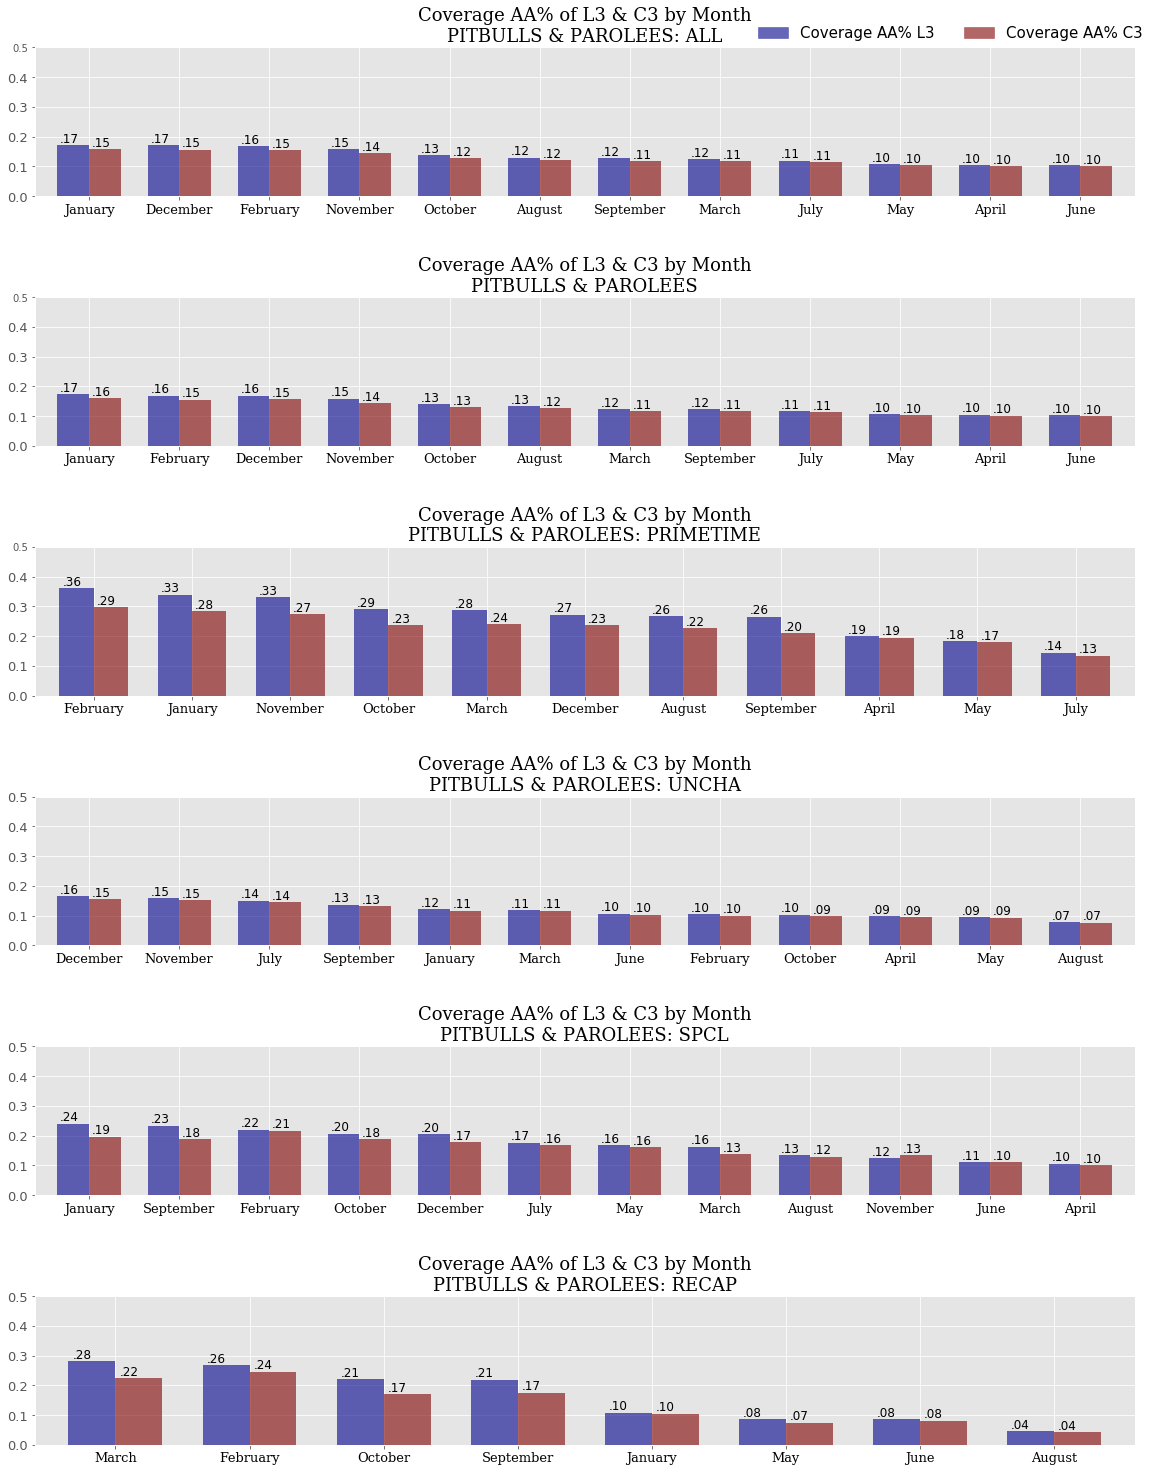

In [68]:
df_ent=df.groupby(['month'])['cvg_aa%_l3d','cvg_aa%_c3'].mean()\
.sort_values('cvg_aa%_l3d', ascending=False).reset_index()
data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']


plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=6, figsize=(16,20))
plt.tight_layout(h_pad=8)

for ax,dfx,name in zip(axes.flat,data, names):
    df_ent=dfx.groupby(['month'])['cvg_aa%_l3d','cvg_aa%_c3'].mean()\
.sort_values('cvg_aa%_l3d', ascending=False).reset_index()

    df_ent[['cvg_aa%_l3d','cvg_aa%_c3']].plot(kind='bar',
               color=['DarkBlue','maroon'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
    for i in ax.patches:
            ax.text(i.get_x()+.03,i.get_height()+.01, \
            '{:.4s}'.format(str(i.get_height())).lstrip('0'),fontsize=12)
    ax.set_xticklabels(df_ent['month'],size =13,family='serif', color='black', rotation='horizontal')
    ax.set_ylim([0,.5])
    leg=ax.legend().set_visible(False)
    ax.set_title("Coverage AA% of L3 & C3 by Month\n"+ name,x=.5, fontsize=18,family='serif')
leg=ax.legend(['Coverage AA% L3','Coverage AA% C3'],  ncol=2,loc='lower right', \
          fontsize=12,prop={'size':15},bbox_to_anchor=(1.02, 9.35))
leg.legendHandles[0].set_color('DarkBlue')
leg.legendHandles[1].set_color('maroon')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

And, again, we can observe the similar scenario as above with coverage L3 and C3 ratings.

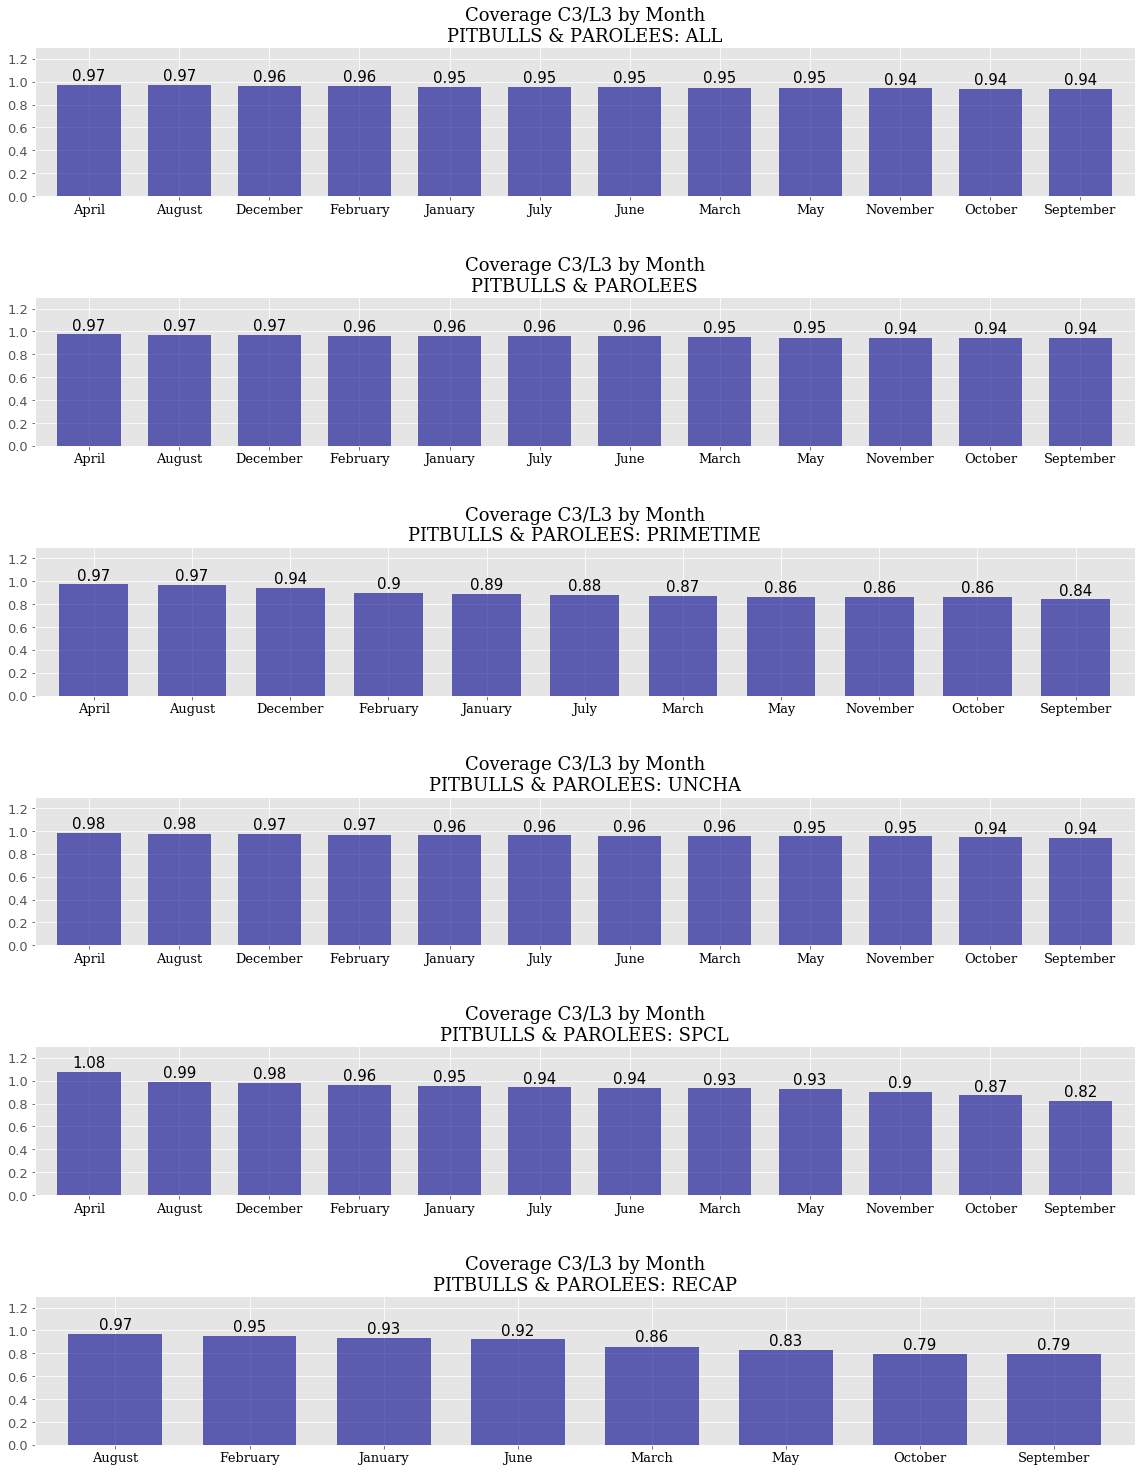

In [69]:
    data=[df,df_pp,df_pp_prime, df_uchained,df_special,df_recap]
    names=['PITBULLS & PAROLEES: ALL','PITBULLS & PAROLEES','PITBULLS & PAROLEES: PRIMETIME',\
       'PITBULLS & PAROLEES: UNCHA',\
     'PITBULLS & PAROLEES: SPCL','PITBULLS & PAROLEES: RECAP']
    
    fig, axes = plt.subplots(nrows=6,figsize=(16,20))
    plt.tight_layout(h_pad=8)
    plt.style.use('ggplot')
    for ax,dfx,name in zip(axes.flat,data, names):
        df_ent=dfx.groupby(['month'])['c3/l3'].mean().to_frame()
        df_ent.reset_index(inplace=True)
        df_entered=df_ent.sort_values(['c3/l3'],ascending=False )
        pos = list(range(len(df_entered['month'])))
        df_entered['c3/l3'].plot(kind='bar',
               color=['DarkBlue'],ax=ax,\
                              fontsize=13, alpha=.6,width=.7)
        ax.set_xticklabels(df_ent['month'],size =13,family='serif', color='black', rotation='horizontal')
        for i, label in enumerate(list(df_entered.index)):
            score = df_entered.loc[label][1].round(2)
            ax.annotate(str(score), (i, score + 0.04),ha='center', size=15)
        ax.set_title("Coverage C3/L3 by Month\n"+ name,x=.5, fontsize=18,family='serif')
        ax.set_ylim([0,1.3])
    plt.show()

It looks like C3/L3 ratio is especially low for primetime, specials, and recaps during the fall (November, October, and September). They are at their highest in April, August, December, and February. 

# Summary and Recommendations

In this report, I looked at how various ratings and C3/L3 ratio relate to program length as well as change over years, months, and days of the week. We can say that C3/L3 ratio represents a short-term impact on C3 rating. Basically, the ratio indicates how likely the audience is to stick to commercial breaks during the program. 

The preliminary findings revealed several interesting observations. First, there is positive relationship between program length for primetimes and specials and: 1) and audience impressions (r=.17 and r=.33, respectively), 2) national L3 rating (r=.16 and r=.33, respectively), 3) audience impressions for commercials (r=.22 and r=.35, respectively), 4) national C3 rating (r=.20 and r=.36, respectively). However, we don’t observe the same relationship between primetime program length and coverage L3(r=.07) and between primetime program length and coverage C3 (r=.10), but we see positive relationship between program length for specials and coverage L3 (r=.31) and between program length for specials and coverage C3 (r=.33). One possible explanation of these findings is that the Lake5 data set possibly includes commercial breaks for national commercials only (which is a limitation fo this data set). That might be one of the reasons why we don’t see any relationship between coverage ratings and program length. It is also possible that premiere episodes ratings behave similarly to the ratings for special episodes, and we can find similar effcts while analyzing premier episodes only. The next step would be to identify premieres and look at the relationship between ratings and program length for the premier episodes. 

There was no relationship between program length and C3/L3 ratio, indicating that, at least, in this data set, there is no possible relationship between program length and C3/L3 ratio. Theoretically, it would mean that even though the program ratio can have a positive effect on overall L3 and C3 ratings, it would not necessarily keep the audience attention during the commercial breaks. 

National and coverage ratings are higher on Friday and Saturday when C3/L3 ratio is at its lowest.  It looks like the audience just hates watching commercials on weekends and more likely to either fast forward commercials or switch to a different channel on Saturdays and Sundays, and that’s the time where advertisers hope that their commercials have a greater impact on the audience.  This pattern is especially apparent for primetime, specials, and recaps where we can see the ratio at its lowest. The very same pattern is observed when the data is broken into primetime hours and hours other than primetime. While ratings are at their highest between hours of 8 pm and 11 pm, C3/L3 ratio is at its lowest at exactly the same time. 

Time-series plot indicated that ratings for Pitbulls & Parolees are possibly on decline. For primetime, they seemed to pick in 2013 and have been slowly declining ever since. C3/L3 ratio exhibits much more stability throughout the years and do not show serious fluctuations, although a steep decline is observed in the second half of 2018.

Finally, the ratings at the highest during the winter (November, January, December, and February) when the show premieres and the lowest during the summer (April, May, July, and August). It looks like C3/L3 ratio is especially low for primetime, specials, and recaps during the fall (November, October, and September), and it is at its highest in April, August, December, and February.

The findings have some implications for business and future data analyses. First, there is a possibility of positive relationship between program length and L3 and C3. This relationship is especially evident for primetime (and especially for national ratings) and specials. It would be useful to look at premieres only as their ratings might behave similarly to specials. Also, looking at ratings for premieres can tell us more about the short-term impact of program length on ratings, and ratings for repeats can tell more about the long-term impact of program length on ratings. Relationship between ratings and program length, however, were especially evident for special episodes. While we could observe the positive relationships between C3 and L3, no relationship between C3/L3 ratio and program length was detected, indicating that even though program length might have positive effect on ratings, the audience would not necessarily stop fast-forwarding or skipping commercials.  

Second, ratings widely fluctuate throughout time, seasons, and years. That means that any comparison with experimental data should be approached with a special caution. Time, seasons, and days of the week should be carefully matched when analyzing the data. Considering the data structure and the presence of multiple confounds, it might be useful to use regression models like a mixed effects model to analyze the data. For example, data for premier episodes should be analyzed separately from the other data. A 3-level multilevel model can be built with episodes nested within seasons at level 3, baseline demographics nested within episodes at level 2, and with baseline demographics at level 1. Considering the nature of the data, this kind of model can partially help to control for multiple confounds. We can also cross-classified model between time and seasons which can help to control for seasonal fluctuations in ratings. In any case and no matter what model is choosen for analysis,  this data analysis indicates that future data and models should be carefully selected to control for confoundings effects. 
